In [60]:
from itertools import combinations
from sys import maxsize
import copy
from copy import deepcopy
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import pandas as pd
import time
pd.set_option('display.max_colwidth', 200)

In [2]:
agents_4 = ['1', '2', '3', '4']

agents_val_4 = {
    ('1',) : 30, ('2',): 40, ('3',): 25, ('4',): 45,
    ('1', '2'): 50, ('1', '3'): 60, ('1', '4'): 80, ('2', '3'): 55, ('2', '4'): 70,  ('3', '4'): 80,
    ('1', '2', '3'): 90, ('1', '2', '4'): 120,  ('1', '3', '4'): 100, ('2', '3', '4'): 115,
    ('1', '2', '3', '4'): 140
}

In [3]:
agents_5 = ['1', '2', '3', '4', '5']

agents_val_5 = {
    ('1',) : 20, ('2',): 10, ('3',): 30, ('4',): 30, ('5',): 10,
    ('1', '2'): 40, ('1', '3'): 30, ('1', '4'): 30, ('1', '5'): 40, ('2', '3'): 40, ('2', '4'): 20, ('2', '5'): 30, ('3', '4'): 20, ('3', '5'): 65, ('4', '5'): 35,
    ('1', '2', '3'): 70, ('1', '2', '4'): 70, ('1', '2', '5'): 60, ('1', '3', '4'): 60, ('1', '3', '5'): 40, ('1', '4', '5'): 80, ('2', '3', '4'): 70, ('2', '3', '5'): 50, ('2', '4', '5'): 75, ('3', '4', '5'): 75,
    ('1', '2', '3', '4'): 110, ('1', '2', '3', '5'): 140, ('1', '2', '4', '5'): 100, ('1', '3', '4', '5'): 150, ('2', '3', '4', '5'): 100,
    ('1', '2', '3', '4', '5'): 165
}

In [4]:
def agent_combinations(agents):
    """
    Generate all possible combinations of agents.

    Args:
        agents (list): A list of agent objects.

    Returns:
        list: A list of tuples representing agent combinations.
    """
    combinations_result = []
    for r in range(1, len(agents)+1):
        combinations_result.extend(combinations(agents, r))
    return combinations_result

def agent_coalitions(elements):
    """
    Generate all possible coalitions of a set of elements.

    Args:
        elements (list): A list of elements.

    Returns:
        set: A set of unique coalition tuples.
    """
    all_combinations = set()  # Use a set to store unique combinations
    if len(elements) > 1:
        for r in range(1, len(elements)):
            for combo in combinations(elements, r):
                group1 = combo
                group2 = tuple(e for e in elements if e not in combo)
                # Sort the groups to ensure uniqueness, as order doesn't matter
                unique_combination = tuple(sorted((group1, group2)))
                all_combinations.add(unique_combination)
        #all_combinations.add(elements) # add itself
    else:
        all_combinations = tuple(elements)
    return all_combinations

def compute_optimal(coalition_values, agents, verbose=False):
    """
    Compute the optimal coalition structure and values for a given set of agents.

    This function iterates through all possible coalitions and their sub-coalitions
    to find the optimal coalition structure that maximizes the total value.

    Args:
        coalition_values (dict): A dictionary where keys are coalitions (tuples of agents) and values are the values associated with those coalitions.
        agents (list): A list of agent objects.
        verbose (bool, optional): If True, print debugging information. Default is False.

    Returns:
        dict: A dictionary where keys are coalitions (tuples of agents) and values arethe optimal values for those coalitions.
    """
    best_split_values = {}

    for coalition in agent_combinations(agents):
        if verbose: print(f"coalition_values: {coalition_values}")
        if verbose: print(f"best_split_values: {best_split_values}\n")
        if verbose: print(f"coalition: {coalition}")
        coalition_split = agent_coalitions(coalition)
        if verbose: print(f"coalition_split: {coalition_split}")

        all_c_split = []
        if len(coalition_split) > 1:
            values = [coalition_values[coalition]] # input value
            coalitions = [coalition]
            best_coalition_index = None

            for c_split in coalition_split:
                c_split_tuple = tuple(c_split)

                split_value = coalition_values[c_split_tuple[0]] + coalition_values[c_split_tuple[1]]
                if verbose: print(f"len(coalition_split) > 1: split_value = coalition_values[c_split_tuple[0]] + coalition_values[c_split_tuple[1]]: {coalition_values[c_split_tuple[0]]} + {coalition_values[c_split_tuple[1]]} = {split_value}")

                values.append(split_value)  # append best value

                coalitions.append(c_split_tuple)

            best_coalition_index = np.argmax(values)

            if verbose: print(f"len(coalition_split) > 1: coalitions: {coalitions}")
            if verbose: print(f"len(coalition_split) > 1: values: {values}")
            if verbose: print(f"len(coalition_split) > 1: best_coalition_index: {best_coalition_index}")

            if best_coalition_index == 0:
                best_split_values[coalition] = values[best_coalition_index]
                coalition_values[coalition] = values[best_coalition_index]
            else:
                best_split_values[coalitions[best_coalition_index]] = values[best_coalition_index]
                coalition_values[coalition] = values[best_coalition_index]

        else:
            if len(coalition) == 1:
                best_split_values[coalition] = coalition_values[coalition]
                if verbose: print("len(coalition) == 1")
            else:
                values = [coalition_values[coalition]] # input value
                coalitions = [coalition]
                best_coalition_index = None

                split_value = coalition_values[tuple(coalition[0])] + coalition_values[tuple(coalition[1])]
                if verbose: print(f"len(coalition) > 1: split_value = coalition_values[tuple(coalition[0])] + coalition_values[tuple(coalition[1])]: {coalition_values[tuple(coalition[0])]} + {coalition_values[tuple(coalition[1])]} = {split_value}")

                values.append(split_value)
                coalitions.append(list(coalition_split)[0])

                best_coalition_index = np.argmax(values)
                if best_coalition_index == 0:
                    best_split_values[coalition] = values[best_coalition_index]
                    coalition_values[coalition] = values[best_coalition_index]
                else:
                    best_split_values[coalitions[best_coalition_index]] = values[best_coalition_index]
                    coalition_values[coalition] = values[best_coalition_index]

                if verbose: print(f"len(coalition) > 1: coalitions: {coalitions}")
                if verbose: print(f"len(coalition) > 1: values: {values}")
                if verbose: print(f"len(coalition) > 1: best_coalition_index: {best_coalition_index}")

    if verbose: print(f"coalition_values: {coalition_values}")
    if verbose: print(f"best_split_values: {best_split_values}\n")
    return best_split_values

In [5]:
coalition_values_4 = copy.deepcopy(agents_val_4)
optimal_values_4 = compute_optimal(coalition_values=coalition_values_4, agents=agents_4, verbose=False)

In [ ]:
#optimal_values_4

In [7]:
coalition_values_5 = copy.deepcopy(agents_val_5)
optimal_values_5 = compute_optimal(coalition_values=coalition_values_5, agents=agents_5, verbose=False)

In [8]:
optimal_values_5

{('1',): 20,
 ('2',): 10,
 ('3',): 30,
 ('4',): 30,
 ('5',): 10,
 ('1', '2'): 40,
 (('1',), ('3',)): 50,
 (('1',), ('4',)): 50,
 ('1', '5'): 40,
 ('2', '3'): 40,
 (('2',), ('4',)): 40,
 ('2', '5'): 30,
 (('3',), ('4',)): 60,
 ('3', '5'): 65,
 (('4',), ('5',)): 40,
 ('1', '2', '3'): 70,
 ('1', '2', '4'): 70,
 ('1', '2', '5'): 60,
 (('1', '4'), ('3',)): 80,
 (('1',), ('3', '5')): 85,
 ('1', '4', '5'): 80,
 ('2', '3', '4'): 70,
 (('2',), ('3', '5')): 75,
 ('2', '4', '5'): 75,
 (('3', '5'), ('4',)): 95,
 ('1', '2', '3', '4'): 110,
 ('1', '2', '3', '5'): 140,
 ('1', '2', '4', '5'): 100,
 ('1', '3', '4', '5'): 150,
 (('2',), ('3', '4', '5')): 105,
 (('1', '2', '3', '5'), ('4',)): 170}

### Results:

The optimal coalition structure is  (('a1', 'a2', 'a3', 'a5'), ('a4')) with a payoff of 170.

In [ ]:
######################################################################################################################################################################################################

In [61]:
def plot_uav_positions(user_positions, uav_positions, m):
    """
    Plot the positions of users and UAVs in a 2D grid.

    Args:
        user_positions (list of tuples): List of (x, y) coordinates of user positions.
        uav_positions (list of tuples): List of (x, y) coordinates of UAV positions.
        m (int): The size of the grid in both X and Y dimensions.

    Returns:
        None
    """
    # Extract x and y coordinates for users and UAVs
    user_x, user_y = zip(*user_positions)
    uav_x, uav_y = zip(*uav_positions)
    # Create a plot to display user and UAV positions
    plt.figure(figsize=(5, 5))
    plt.scatter(user_x, user_y, color='grey', label='Users', marker='o', s=30)
    plt.scatter(uav_x, uav_y, color='blue', label='UAVs', marker='^', s=80)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('User and UAV Positions')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # Set the grid to show 10x10 with 1 spacing
    plt.xticks(range(1, m + 1))
    plt.yticks(range(1, m + 1))
    plt.grid(True, which='both', linestyle='--', lw=1)
    plt.show()

def social_opt_position(m):
    """
    Compute the socially optimal positions for 2 UAVs

    Args:
        m (int): the size of the grid

    Returns:
        A list of socially optimum positions
    """
    x_min = y_min = 1
    x_max = y_max = m
    x_mid = y_mid = (m+1)/2

    if m % 2 == 0: # If even
        # Even
        even_opt_1 = [
            (math.floor((x_min + x_mid)/2), math.floor((y_min + y_max)/2)), (math.ceil((x_mid + x_max)/2), math.ceil((y_min + y_max)/2))
        ]

        even_opt_2 = [
            (math.floor((x_min + x_mid)/2), math.ceil((y_min + y_max)/2)), (math.ceil((x_mid + x_max)/2), math.floor((y_min + y_max)/2))
        ]

        even_opt_3 = [
            (math.floor((x_min + x_max)/2), math.floor((y_min + y_mid)/2)), (math.ceil((x_min + x_max)/2), math.ceil((y_mid + y_max)/2))
        ]

        even_opt_4 = [
            (math.floor((x_min + x_max)/2), math.ceil((y_mid + y_max)/2)), (math.ceil((x_min + x_max)/2), math.floor((y_min + y_mid)/2))
        ]

        return [even_opt_1, even_opt_2, even_opt_3, even_opt_4]

    else: # Odd
        odd_opt_1 = [
            (int((x_min + x_mid)/2), int((y_min + y_max)/2)), (int((x_mid + x_max)/2), int((y_min + y_max)/2))
        ]

        odd_opt_2 = [
            (int((x_min + x_max)/2), int((y_min + y_mid)/2)), (int((x_min + x_max)/2), int((y_mid + y_max)/2))
        ]

        return [odd_opt_1, odd_opt_2]

def user_utility(model, uav_positions_):
    """
    Calculate the utility based on the total distances of all users relative to the UAVs.

    Args:
        uav_positions_ (list of tuples): List of UAV positions.

    Returns:
        float: Total distance-based utility.
    """
    total_distance_utility = 0.0

    for user_position in model.user_positions:
        min_distance = float('inf')

        for uav_position in uav_positions_:
            distance = model.euclidean_distance(user_position, uav_position)
            if distance < min_distance:
                min_distance = distance

        total_distance_utility += min_distance

    return -total_distance_utility

In [62]:
class BestResponseLearning:
    """
    Initialize the BestResponseLearning class.

    Args:
        num_uav (int): The number of UAVs.
        m (int): The size of the grid in both X and Y dimensions.

    """
    def __init__(self, num_uav, m):
        self.num_uav = num_uav
        self.m = m
        self.user_positions = [(x, y) for x in range(1, self.m + 1) for y in range(1, self.m + 1)]  # Generate user positions uniformly across the grid

        # Ensure unique UAV positions
        if self.num_uav > len(self.user_positions):
            raise ValueError("The number of UAVs exceeds the maximum possible unique positions.")

        unique_positions = random.sample(self.user_positions, self.num_uav)
        self.uav_positions = unique_positions

    def move(self, position, direction):
        """
        Move a position in a specified direction.

        Args:
            position (tuple): The current (x, y) position.
            direction (str): The direction to move ('N', 'E', 'S', 'W').

        Returns:
            tuple: The new (x, y) position after the move.

        """
        x, y = position
        if direction == 'N':
            new_position = (x, y + 1)
        elif direction == 'E':
            new_position = (x + 1, y)
        elif direction == 'S':
            new_position = (x, y - 1)
        elif direction == 'W':
            new_position = (x - 1, y)
        else:
            raise ValueError("Invalid direction")
        return new_position

    # Utility function to calculate Euclidean distance
    def euclidean_distance(self, point1, point2):
        """
        Calculate the Euclidean distance between two points.

        Args:
            point1 (tuple): The (x, y) coordinates of the first point.
            point2 (tuple): The (x, y) coordinates of the second point.

        Returns:
            float: The Euclidean distance between the two points.

        """
        x1, y1 = point1
        x2, y2 = point2
        return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

    def connect_users_to_uavs_original(self, curr_uav_position, uav_positions_):
        """
        Connect users to UAVs based on proximity.

        Args:
            curr_uav_position (tuple): The current (x, y) position of the UAV.
            uav_positions_ (list of tuples): List of UAV positions.

        Returns:
            dict: A dictionary where keys are UAV positions and values are the number of connected users.

        """
        users_connected_to_uav = {p: 0 for p in uav_positions_}

        for user_position in self.user_positions:
            # Find the index of the closest UAV based on minimum Euclidean distance
            #print("user_position", user_position)
            dist = []
            for uav_position in uav_positions_:
                dist.append(self.euclidean_distance(user_position, uav_position))
                #print(f"user_position:{user_position}, uav_position: {uav_position}, euclidean_distance:{euclidean_distance(user_position, uav_position)}, dist: {dist}")
            if len(set(dist)) == 1: # All distances are the same
                #print(f"len(set(dist)) == 1: {len(set(dist)) == 1:}")
                for uav_position in uav_positions_:
                    users_connected_to_uav[uav_position] += 1/len(uav_positions_)
                #print(f"users_connected_to_uav: {users_connected_to_uav}")
            else:
                #print("else:")
                uav_idex = np.argmin(dist)
                users_connected_to_uav[uav_positions_[uav_idex]] += 1
                #print(f"users_connected_to_uav: {users_connected_to_uav}")

        return users_connected_to_uav[curr_uav_position]

    def compute_user_utility_by_uav(self, uav_positions_):
        """
        Calculate the utility based on the total distances of all users relative to the UAVs.

        Args:
            uav_positions_ (list of tuples): List of UAV positions.

        Returns:
            dict: Dictionary with UAV positions as keys and their respective total distance-based utility as values.
        """
        uav_total_utility = {}
        for user_position in self.user_positions:
            uav_distances = []
            uav_positions = []
            for uav_position in uav_positions_:
                uav_distances.append(self.euclidean_distance(user_position, uav_position))
                uav_positions.append(uav_position)

            min_indices = [index for index, value in enumerate(uav_distances) if value == min(uav_distances)]

            for ind in min_indices:
                if len(min_indices) > 1:
                    uav_total_utility[uav_positions[ind]] = round(uav_total_utility.get(uav_positions[ind], 0) - uav_distances[ind]/len(min_indices), 5)

                else:
                    uav_total_utility[uav_positions[ind]] = round(uav_total_utility.get(uav_positions[ind], 0) - uav_distances[ind], 5)

        return uav_total_utility

    def plot_user_and_uav_positions(self):
        """
        Plot the positions of users and UAVs on a 2D grid.

        """
        # Extract x and y coordinates for users and UAVs
        user_x, user_y = zip(*self.user_positions)
        uav_x, uav_y = zip(*self.uav_positions)
        # Create a plot to display user and UAV positions
        plt.figure(figsize=(3, 3))
        plt.scatter(user_x, user_y, color='grey', label='Users', marker='o', s=30)
        plt.scatter(uav_x, uav_y, color='blue', label='UAVs', marker='^', s=80)
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title('User and UAV Positions')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        # Set the grid to show 10x10 with 1 spacing
        plt.xticks(range(1, self.m + 1))
        plt.yticks(range(1, self.m + 1))
        plt.grid(True, which='both', linestyle='--', lw=1)
        plt.show()

    def update_uav_positions(self, tuples_list, target_position, new_tuple):
        """
        Update the UAV positions in a list.

        Args:
            tuples_list (list of tuples): List of UAV positions.
            target_position (tuple): The position to be updated.
            new_tuple (tuple): The new position to replace the target.
        """
        for i, t in enumerate(tuples_list):
            if t == target_position:
                tuples_list[i] = new_tuple
        return tuples_list

    def transition(self, verbose):
        """
        Perform a transition step for the UAVs based on their best response strategy.

        Args:
            verbose (bool): Whether to print verbose information.

        Returns:
            tuple: A tuple containing lists of new UAV positions, and a flag indicating if UAVs are done moving.

        """
        occupied_positions = set(self.uav_positions)
        is_done = []
        uav_moves = []
        utilities = []
        for i in range(len(self.uav_positions)): # Loop through all uavs
            directions = ["N", "E", "S", "W"]
            possible_utilities = []
            possible_directions = []
            curr_pos = self.uav_positions[i] # Current position
            uav_curr_utility = self.connect_users_to_uavs_original(curr_pos, self.uav_positions) # Current utility

            for dir in directions:  # Loop through all possible actions
                new_pos = self.move(curr_pos, dir)  # Get new position if UAV moves in the specified direction
                # Check if the new position is not already occupied by another UAV
                if new_pos not in uav_moves and new_pos not in occupied_positions:
                    uav_positions_copy = copy.deepcopy(self.uav_positions)
                    uav_positions_copy = self.update_uav_positions(uav_positions_copy, curr_pos, new_pos)  # Update the UAV's hypothetical position
                    uav_new_utility = self.connect_users_to_uavs_original(new_pos, uav_positions_copy)  # Retrieve utility for the new position
                    possible_utilities.append(uav_new_utility)
                    possible_directions.append(dir)

            if verbose: print(f"curr position: {curr_pos}, curr utility: {uav_curr_utility}")
            if verbose: print(f"possible_directions: {possible_directions}, possible_utilities: {possible_utilities}\n")

            if len(possible_utilities) > 0 and uav_curr_utility <= max(possible_utilities):
                best_direction = possible_directions[np.argmax(possible_utilities)]  # Best direction to move towards
                move_to_best_direction = self.move(curr_pos, best_direction) # Move to the best direction
                uav_moves.append(move_to_best_direction)
                is_done.append(False)
                utilities.append(max(possible_utilities))
                if verbose: print(f"if: best_direction: {best_direction}, best_direction coord: {move_to_best_direction}, new_utility: {max(possible_utilities)}, uav_moves: {uav_moves}, is_done: {is_done}\n")
                #self.plot_user_and_uav_positions()

            else:
                uav_moves.append(curr_pos)
                is_done.append(True)
                utilities.append(uav_curr_utility)
                if verbose: print(f"else: utility: {uav_curr_utility}, uav_moves: {uav_moves}, is_done: {is_done}\n")
                #self.plot_user_and_uav_positions()

        return uav_moves, is_done

    def run(self, max_iter, max_dev_not_improved, verbose=False, verbose_plot=True):
        """
        Run the BestResponseLearning algorithm.

        Args:
            max_iter (int): The maximum number of iterations.
            max_dev_not_improved (int): The maximum number of iterations with no improvement in standard deviation.
            verbose (bool): Whether to print verbose information.

        """
        if verbose_plot:
            print("Iteration: 0")
            self.plot_user_and_uav_positions()

        iteration = 1
        stdev_not_improved_cnt = 0
        stdev_list = [float("Inf")]
        stdev_best = float("Inf")
        all_uav_positions_list = [[(0,0), (0,0)]]
        all_utilities = [[0,0]]

        # Loop through all UAVs and make transition
        while iteration < max_iter:
            uav_new_positions, uav_is_done = self.transition(verbose=False)
            utilities = []
            uav_positions_list = []
            for uav_index in range(len(self.uav_positions)):
                utilities.append(self.connect_users_to_uavs_original(self.uav_positions[uav_index], self.uav_positions))
                uav_positions_list.append(self.uav_positions[uav_index])
            # Save intermediate outputs
            stdev_list.append(np.std(utilities))
            all_uav_positions_list.append(uav_positions_list)
            all_utilities.append(utilities)

            if verbose_plot: print(f"\nIteration: {iteration}, \nall_uav_positions_list: {all_uav_positions_list}, \nall_utilities: {all_utilities}, \nstdev_list: {stdev_list}, \nmin(stdev_list): {min(stdev_list)}")
            # Check if the standard deviation has improved
            if stdev_list[-1] < stdev_best:
                stdev_best = stdev_list[-1]
                stdev_not_improved_cnt = 0
                if verbose: print("improved:", stdev_not_improved_cnt)
            else:
                stdev_not_improved_cnt += 1
                if verbose: print("NOT improved:", stdev_not_improved_cnt)

            if stdev_not_improved_cnt == max_dev_not_improved:
                #print("stdev_not_improved_cnt:", stdev_not_improved_cnt)
                if verbose: print(f"\nTerminating. No improvement from the previous standard deviation of the UAV utilities in the last {max_dev_not_improved} iterations.")
                break

            iteration += 1
            # Update the UAV positions
            self.uav_positions = uav_new_positions
            if verbose_plot: self.plot_user_and_uav_positions()

        # Show the positions with the first best standard deviation in UAV utilities
        best_index = np.argmin(stdev_list)
        if verbose_plot: print(f"Best positions for minimum utility standard deviation: {all_uav_positions_list[best_index]}, Utilities: {all_utilities[best_index]}, StDev: {stdev_list[best_index]}")
        if verbose_plot: plot_uav_positions(self.user_positions, all_uav_positions_list[best_index], self.m)

        return all_uav_positions_list[best_index], all_utilities[best_index]

In [ ]:
brl = BestResponseLearning(num_uav=2, m=10)
brl_position_result = brl.run(max_iter=1000, max_dev_not_improved=10, verbose=False)

The termination process in the provided BestResponseLearning class is part of the algorithm's run loop and determines when to stop the iterative process. The termination process is based on a criterion related to the improvement of the standard deviation of UAV utilities over a set number of iterations. The goal is to stop the loop from going to infinity when there is no further significant improvement or change in the transition process.
1. The algorithm starts with an initial set of UAV positions, and a list to keep track of the standard deviation of utilities across UAVs at each iteration.
2. The algorithm enters an iterative loop with a maximum number of iterations specified by the max_iter parameter.
3. In each iteration, the algorithm performs a transition for each UAV. The transition involves considering possible movements for each UAV, calculating the utility for the current position, and evaluating the utilities for potential new positions based on the Best-Response Learning (BRL) algorithm.
4. After the transition for all UAVs, the algorithm calculates the standard deviation of utilities for all UAVs. The standard deviation reflects how evenly users are distributed among UAVs.
5. The algorithm checks if the current standard deviation is better (lower) than the best standard deviation observed so far. If it is, the current standard deviation becomes the new best standard deviation, and a counter for the number of iterations with no improvement (stdev_not_improved_cnt) is reset to zero.
6. If the current standard deviation is not better than the best standard deviation, the counter for the number of iterations with no improvement is incremented (stdev_not_improved_cnt).
7. The termination process checks whether the counter stdev_not_improved_cnt has reached a predefined threshold, which is specified by the max_dev_not_improved parameter. If the counter reaches this threshold, it means that there has been no improvement in the standard deviation of utilities for the past max_dev_not_improved iterations.
8. If the termination condition is met (stdev_not_improved_cnt equals max_dev_not_improved), the algorithm terminates and stops further iterations

Depending on the random initialization, the two-node case may or may not end up in a Nash equilibrium. Since the UAVs take turn to move, the UAV that reaches the center sooner (captures higher utility due to closer proximity to more users) may execute best responses to prevent the other UAV from taking a better position with a higher utility. This happens due to the game being turn-based and multiple UAVs cannot occupy the same coordinate in the grid. Theforefore, it's possible for the UAVs to get blocked from achieving the best equilibrium and they may also oscillate in certain positions in an infinite loop.

The Nash equilibrium tends to occur in the center of the grid with the two UAVs positioned side by side, as a result each uav may capture half of all users. While the two UAVs has reached a stable equilibrium because neither has the incentive to deivate, it may not be socially optimal for the users. The total distance of the users to the UAVs could be unproportionately distributed, as those along the center region would have the shortest distances to the UAVs, and those further out along the edges tend to have longer distances, or if the user distribution between the uavs are imbalanced. Therefore, the sum of the distances of all users is not minimized, which is required under social optimality.

As shown below, the social optimum cases have a higher utility than in the case of the Nash equilibrium.

### Nash Equilibrium

In [48]:
print(f"UAV Position: {brl_position_result[0]}, UAV Utility: {brl_position_result[1]}, User Utility: {brl.compute_user_utility_by_uav(brl_position_result[0])}, Total User Utility: {np.sum(list(brl.compute_user_utility_by_uav(brl_position_result[0]).values()))}")

UAV Position: [(7, 7), (8, 6)], UAV Utility: [59.5, 40.5], User Utility: {(7, 7): -245.60921, (8, 6): -142.01965}, Total User Utility: -387.62886000000003


### Social Optimums

In [47]:
for positions in social_opt_position(m=10):
    print(f"UAV Position: {positions}, UAV Utility: {[brl.connect_users_to_uavs_original(position, positions) for position in positions]}, User Utility: {brl.compute_user_utility_by_uav(positions)}, Total User Utility: {np.sum(list(brl.compute_user_utility_by_uav(positions).values()))}")

UAV Position: [(3, 5), (8, 6)], UAV Utility: [50.0, 50.0], User Utility: {(3, 5): -147.66515, (8, 6): -147.66515}, Total User Utility: -295.3303
UAV Position: [(3, 6), (8, 5)], UAV Utility: [50.0, 50.0], User Utility: {(3, 6): -147.66515, (8, 5): -147.66515}, Total User Utility: -295.3303
UAV Position: [(5, 3), (6, 8)], UAV Utility: [50.0, 50.0], User Utility: {(5, 3): -147.66515, (6, 8): -147.66515}, Total User Utility: -295.3303
UAV Position: [(5, 8), (6, 3)], UAV Utility: [50.0, 50.0], User Utility: {(6, 3): -147.66515, (5, 8): -147.66515}, Total User Utility: -295.3303


With the addition of more UAV nodes, the competition among UAVs to serve users intensifies. Each UAV is self-interested and aims to maximize the number of users it serves. The equilibrium outcomes, in this case, will involve a complex interplay of UAV positions as they continuously adjust to optimize their utilities. The algorithm will seek to find positions for UAVs that balance user allocations to maximize their individual utilities. The UAV nodes appear to cluster near the center region. With 3 UAVs, they tend to still stick near each other with no node of separation. Beyond 3 UAV nodes however, it can be observed that the nodes have a tendency to split into groups of two and stick around each other.

These equilibrium outcomes are still not socially optimal because socially optimal outcomes are determined by minimizing the total distance for all users across the grid, ensuring that each UAV serves users efficiently and equally. The self-interested nature of UAVs makes them continue to search for optimal positions to maximize individual utility rather than achieving a globally optimal distribution of users in most cases. However, assuming that m stays fixed, when the number of UAV nodes increase, the distance among the nodes tend to increase, thus the average distance between users and UAVs decreases, although is still not socially optimal, the utility of the users should increase.

In [ ]:
brl = BestResponseLearning(num_uav=3, m=10)
brl.run(max_iter=1000, max_dev_not_improved=10, verbose=False)

In [ ]:
brl = BestResponseLearning(num_uav=4, m=10)
brl.run(max_iter=1000, max_dev_not_improved=10, verbose=False)

Q learning is a reinforcement learning algorithm well-suited for solving problems with discrete state and action spaces, making it an appropriate choice for optimizing UAV action selection. In this problem, the state space represents the positions of UAVs and users within an m-by-m area, while actions are discrete movements: North, East, South, and West. Q-Learning could navigates this discrete landscape. The algorithm balances exploration and exploitation by allowing UAVs to explore different positions while also exploiting known good ones, crucial for optimizing connectivity. It does so through an exploration probability, ensuring a probabilistic approach to action selection.

The Q learning model's goal is to learn the optimal action-value function, representing expected cumulative rewards for taking actions in given states. This aligns well with the objective of finding the best UAV placement to maximize user connectivity. It does so through iteratively updating Q-values based on observed rewards (user connectivity) and transitions (UAV movements), ultimately converging to the optimal policy. More importantly, Q-Learning is model-free, making it suitable for dynamic, complex scenarios where explicit modeling may be challenging. Like the BRL model, this model also incorporates a termination condition based on the standard deviation of utilities, allowing it to terminate when further optimization is unlikely. Also, the Q learning algorithm is flexible to changes and scales well as the number of UAVs and users increases, with its ability to handle discrete state and action spaces, along with its ability to balance exploration and exploitation, which is makes it suitable for this problem.

## Reinforcement Learning

In [4]:
class QLearningBestResponse:
    """
    Initialize the QLearningBestResponse class.

    Args:
        num_uav (int): Number of UAVs.
        m (int): Grid size (m x m).
        learning_rate (float): Learning rate for Q-learning.
        discount_factor (float): Discount factor for future rewards.
        exploration_prob (float): Probability of taking a random action.
        verbose (bool): Whether to print verbose information.
    """
    def __init__(self, num_uav, m, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.1, verbose=False):
        self.num_uav = num_uav
        self.m = m
        self.user_positions = [(x, y) for x in range(1, self.m + 1) for y in range(1, self.m + 1)]
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_prob = exploration_prob

        if self.num_uav > len(self.user_positions):
            raise ValueError("The number of UAVs exceeds the maximum possible unique positions.")

        self.uav_positions = random.sample(self.user_positions, self.num_uav)
        self.q_table = {k: {"N": 0, "E": 0, "S": 0, "W": 0} for k in self.user_positions} #{}  # Q-table to store Q-values
        self.verbose = verbose

    def get_valid_new_state(self, state, max_attempts=10):
        """
        Get a valid new state for a given state.

        Args:
            state (tuple): Current state.
            max_attempts (int): Maximum attempts to find a valid new state.

        Returns:
            tuple: Valid new state.
        """
        # Find the action with the highest Q-value
        max_action = max(self.q_table[state], key=self.q_table[state].get)
        new_state = self.move(state, max_action)
        attempts = 0

        while new_state in self.uav_positions and attempts < max_attempts:
            # If there's an overlap, keep trying different new states based on Q-values until a valid one is found
            actions = sorted(self.q_table[state], key=lambda k: self.q_table[state][k], reverse=True)
            actions.remove(max_action)  # Remove the current max action

            for action in actions:
                new_state = self.move(state, action)
                if new_state not in self.uav_positions:
                    return new_state
            attempts += 1

        return new_state

    def move(self, position, direction):
        """
        Move from a current position to a new position based on a given direction.

        Args:
            position (tuple): Current position.
            direction (str): Direction to move ('N', 'E', 'S', 'W').

        Returns:
            tuple: New position after the move.
        """
        x, y = position
        if direction == 'N':
            new_position = (x, y + 1)
        elif direction == 'E':
            new_position = (x + 1, y)
        elif direction == 'S':
            new_position = (x, y - 1)
        elif direction == 'W':
            new_position = (x - 1, y)
        else:
            raise ValueError("Invalid direction")

        # Check if the new position is within the grid boundaries
        new_x, new_y = new_position
        if 1 <= new_x <= self.m and 1 <= new_y <= self.m:
            return new_position
        else:
            return position  # Return the current position if it's outside the boundaries

    def euclidean_distance(self, point1, point2):
        """
        Calculate the Euclidean distance between two points.

        Args:
            point1 (tuple): First point (x, y).
            point2 (tuple): Second point (x, y).

        Returns:
            float: Euclidean distance between the two points.
        """
        x1, y1 = point1
        x2, y2 = point2
        return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

    def update_uav_positions(self, tuples_list, target_position, new_tuple):
        """
        Update the UAV positions list by replacing a target position with a new position.

        Args:
            tuples_list (list of tuples): List of tuples representing UAV positions.
            target_position (tuple): Position to be replaced.
            new_tuple (tuple): New position to replace the target position.
        """
        for i, t in enumerate(tuples_list):
            if t == target_position:
                tuples_list[i] = new_tuple
        return tuples_list

    def connect_users_to_uavs_original(self, curr_uav_position, uav_positions_):
        """
        Calculate the number of users connected to a specific UAV. The utility of the UAVs.

        Args:
            curr_uav_position (tuple): Current UAV position.
            uav_positions_ (list of tuples): List of UAV positions.

        Returns:
            int: Number of users connected to the current UAV.
        """
        users_connected_to_uav = {p: 0 for p in uav_positions_}

        for user_position in self.user_positions:
            # Find the index of the closest UAV based on minimum Euclidean distance
            #print("user_position", user_position)
            dist = []
            for uav_position in uav_positions_:
                dist.append(self.euclidean_distance(user_position, uav_position))
                #print(f"user_position:{user_position}, uav_position: {uav_position}, euclidean_distance:{euclidean_distance(user_position, uav_position)}, dist: {dist}")
            if len(set(dist)) == 1: # All distances are the same
                #print(f"len(set(dist)) == 1: {len(set(dist)) == 1:}")
                for uav_position in uav_positions_:
                    users_connected_to_uav[uav_position] += 1/len(uav_positions_)
                #print(f"users_connected_to_uav: {users_connected_to_uav}")
            else:
                #print("else:")
                uav_idex = np.argmin(dist)
                users_connected_to_uav[uav_positions_[uav_idex]] += 1
                #print(f"users_connected_to_uav: {users_connected_to_uav}")

        return users_connected_to_uav[curr_uav_position]


    def compute_user_utility_by_uav(self, uav_positions_):
        """
        Calculate the utility based on the total distances of all users relative to the UAVs.

        Args:
            uav_positions_ (list of tuples): List of UAV positions.

        Returns:
            dict: Dictionary with UAV positions as keys and their respective total distance-based utility as values.
        """
        uav_total_utility = {}
        for user_position in self.user_positions:
            uav_distances = []
            uav_positions = []
            for uav_position in uav_positions_:
                uav_distances.append(self.euclidean_distance(user_position, uav_position))
                uav_positions.append(uav_position)

            min_indices = [index for index, value in enumerate(uav_distances) if value == min(uav_distances)]

            for ind in min_indices:
                if len(min_indices) > 1:
                    uav_total_utility[uav_positions[ind]] = round(uav_total_utility.get(uav_positions[ind], 0) - uav_distances[ind]/len(min_indices), 5)

                else:
                    uav_total_utility[uav_positions[ind]] = round(uav_total_utility.get(uav_positions[ind], 0) - uav_distances[ind], 5)

        return uav_total_utility

    def plot_user_and_uav_positions(self):
        """
        Plot the user and UAV positions on a grid.
        """
        # Extract x and y coordinates for users and UAVs
        user_x, user_y = zip(*self.user_positions)
        uav_x, uav_y = zip(*self.uav_positions)
        # Create a plot to display user and UAV positions
        plt.figure(figsize=(3, 3))
        plt.scatter(user_x, user_y, color='grey', label='Users', marker='o', s=30)
        plt.scatter(uav_x, uav_y, color='blue', label='UAVs', marker='^', s=80)
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title('User and UAV Positions')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        # Set the grid to show 10x10 with 1 spacing
        plt.xticks(range(1, self.m + 1))
        plt.yticks(range(1, self.m + 1))
        plt.grid(True, which='both', linestyle='--', lw=1)
        plt.show()

    def update_q_table(self, state, action, reward, next_state):
        """
        Update the Q-table with new Q-values.

        Args:
            state (tuple): Current state.
            action (str): Chosen action.
            reward (float): Received reward.
            next_state (tuple): Next state.
        """
        # Best value for the next state
        max_next_action_value = max(self.q_table[next_state].values())
        # Update q table
        self.q_table[state][action] = (1 - self.learning_rate) * self.q_table[state][action] + self.learning_rate * (reward + self.discount_factor * max_next_action_value)

    def select_action(self, state):
        """
        Select an action based on the Q-table.

        Args:
            state (tuple): Current state.

        Returns:
            str: Chosen action ('N', 'E', 'S', 'W').
        """
        # Choose a random action
        if random.random() < self.exploration_prob:
            if self.verbose: print("Random Action")
            return random.choice(["N", "E", "S", "W"])
        else:
            # Choose the available best action
            max_actions = [action for action in self.q_table[state] if self.q_table[state][action] == max(self.q_table[state].values())]
            action = random.choice(max_actions)
            if self.verbose: print(f"self.q_table[state]: {self.q_table[state]}")
            if self.verbose: print(f"Action: max(self.q_table[state], key=self.q_table[state].get): max({self.q_table[state]}, key=self.q_table[state].get): {max(self.q_table[state], key=self.q_table[state].get)}")
            return action

    def transition(self, uav_index, verbose=False):
        """
        Perform a state transition for a UAV.

        Args:
            uav_index (int): Index of the UAV.
            verbose (bool): Whether to print verbose information.

        Returns:
            tuple: New state, flag indicating if the transition is done, and the new utility value.
        """
        state = self.uav_positions[uav_index]
        occupied_positions = set(self.uav_positions)
        uav_curr_utility = self.connect_users_to_uavs_original(state, self.uav_positions)
        action = self.select_action(state)
        new_state = self.move(state, action)

        if verbose:
            print(f"UAV {uav_index} - state: {state}, uav_curr_utility: {uav_curr_utility}, action: {action}, new_state: {new_state}")
        # Check if the new state is an occupied position by another UAV
        if new_state not in occupied_positions:
            uav_positions_copy = copy.deepcopy(self.uav_positions) # Keep a copy of the UAV's positions
            uav_positions_copy = self.update_uav_positions(uav_positions_copy, state, new_state) # Update the UAV's copied positions
            uav_new_utility = self.connect_users_to_uavs_original(new_state, uav_positions_copy) # Number of users connected to the new position
            # Check if the new position has a better utility
            if uav_new_utility >= uav_curr_utility:
                self.update_q_table(state, action, uav_new_utility, new_state)  # Update the q table
                self.uav_positions = uav_positions_copy  # Update the UAV's actual positions
                return new_state, False, uav_new_utility

        return state, True, uav_curr_utility

    def train(self, num_episodes=1000):
        """
        Train the Q-learning agent over a specified number of episodes.

        Args:
            num_episodes (int): Number of episodes to train.
        """
        # Train for specified number of episodes
        for episode in range(num_episodes):
            self.uav_positions = random.sample(self.user_positions, self.num_uav)  # Randomly initialize a new starting state
            is_done = False
            # Loop through all UAVs until termination
            while not is_done:
                for uav_index in range(len(self.uav_positions)):
                    uav_new_position, uav_is_done, utility = self.transition(uav_index, verbose=False)  # Transition to the next step
                    is_done = uav_is_done

    def run(self, max_iter=1000, max_dev_not_improved=10, verbose=False, verbose_plot=True):
        """
        Run the Q-learning agent to optimize UAV positions.

        Args:
            max_iter (int): Maximum number of iterations.
            max_dev_not_improved (int): Maximum number of iterations with no improvement.
            verbose (bool): Whether to print verbose information.
        """
        if verbose_plot:
            print("Iteration: 0")
            self.plot_user_and_uav_positions()

        iteration = 1
        stdev_not_improved_cnt = 0
        stdev_list = [float("Inf")]
        stdev_best = float("Inf")
        all_uav_positions_list = [[(0,0), (0,0)]]
        all_utilities = [[0,0]]

        # Loop until the max iteration threshold is reached or the terminate proess kicks in
        while iteration < max_iter:
            utilities = []
            uav_positions_list = []
            for uav_index in range(len(self.uav_positions)): # Loop through all UAVs
                state = self.uav_positions[uav_index]
                #action = max(self.q_table[state], key=self.q_table[state].get)  # Choose an action based on the best Q value
                action = self.select_action(state)
                new_state = self.move(state, action)
                new_state = self.get_valid_new_state(new_state)  # Check if the new state is valid position that is not already occupied by another UAV
                self.uav_positions = self.update_uav_positions(self.uav_positions, state, new_state) # Update the UAV's position
                state = new_state
                uav_positions_list.append(self.uav_positions[uav_index])

            utilities.append([self.connect_users_to_uavs_original(position, self.uav_positions) for position in self.uav_positions])
            stdev_list.append(np.std(utilities))
            all_uav_positions_list.append(uav_positions_list)
            all_utilities.append(utilities)

            if verbose_plot: print(f"\nIteration: {iteration}, \nall_uav_positions_list: {all_uav_positions_list}, \nall_utilities: {all_utilities}, \nstdev_list: {stdev_list}, \nmin(stdev_list): {min(stdev_list)}")
            # Check if there's improvement in the standard deviation of the UAV's utility
            if stdev_list[-1] < stdev_best:
                stdev_best = stdev_list[-1]
                stdev_not_improved_cnt = 0
                if verbose: print("improved:", stdev_not_improved_cnt)
            else:
                stdev_not_improved_cnt += 1
                if verbose: print("NOT improved:", stdev_not_improved_cnt)

            if stdev_not_improved_cnt == max_dev_not_improved:
                if verbose: print(f"\nTerminating. No improvement from the previous standard deviation of the UAV utilities in the last {max_dev_not_improved} iterations.")
                break

            iteration += 1
            if verbose_plot: self.plot_user_and_uav_positions()

        # Display the positions of the UAVs with the first best utility standard deviation
        best_index = np.argmin(stdev_list)
        if verbose: print(f"Best_index: {best_index}")
        if verbose_plot: print(f"Best positions for minimum utility standard deviation: {all_uav_positions_list[best_index]}, Utilities: {all_utilities[best_index]}, StDev: {stdev_list[best_index]}")
        if verbose_plot: plot_uav_positions(self.user_positions, all_uav_positions_list[best_index], self.m)

        return all_uav_positions_list[best_index], all_utilities[best_index]

Iteration: 0


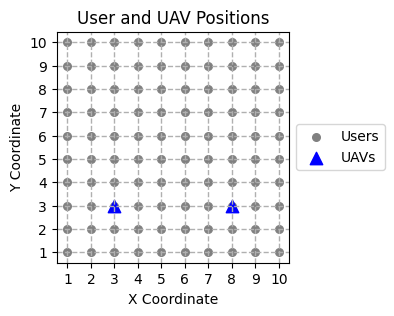


Iteration: 1, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(4, 4), (7, 4)]], 
all_utilities: [[0, 0], [[50, 50]]], 
stdev_list: [inf, 0.0], 
min(stdev_list): 0.0


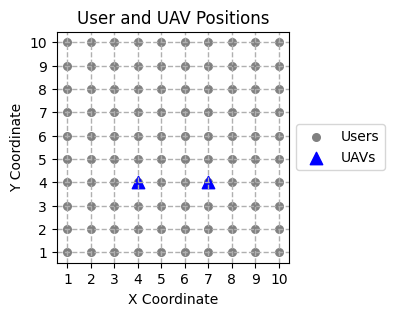


Iteration: 2, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(4, 4), (7, 4)], [(5, 5), (5, 4)]], 
all_utilities: [[0, 0], [[50, 50]], [[60, 40]]], 
stdev_list: [inf, 0.0, 10.0], 
min(stdev_list): 0.0


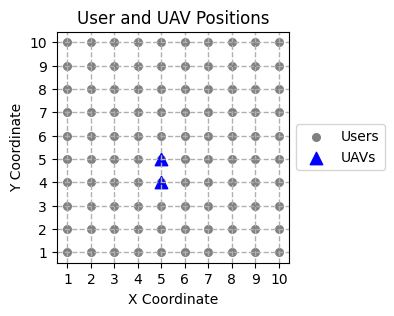


Iteration: 3, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(4, 4), (7, 4)], [(5, 5), (5, 4)], [(6, 6), (5, 6)]], 
all_utilities: [[0, 0], [[50, 50]], [[60, 40]], [[50, 50]]], 
stdev_list: [inf, 0.0, 10.0, 0.0], 
min(stdev_list): 0.0


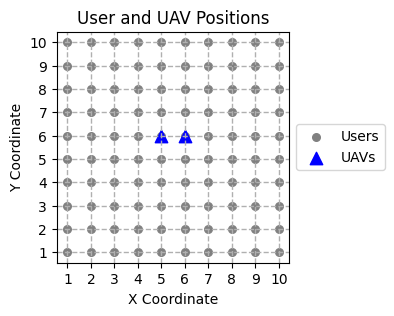


Iteration: 4, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(4, 4), (7, 4)], [(5, 5), (5, 4)], [(6, 6), (5, 6)], [(5, 5), (6, 5)]], 
all_utilities: [[0, 0], [[50, 50]], [[60, 40]], [[50, 50]], [[50, 50]]], 
stdev_list: [inf, 0.0, 10.0, 0.0, 0.0], 
min(stdev_list): 0.0


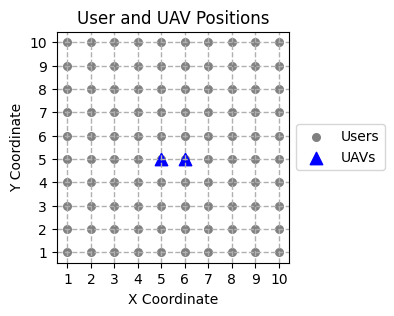


Iteration: 5, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(4, 4), (7, 4)], [(5, 5), (5, 4)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)]], 
all_utilities: [[0, 0], [[50, 50]], [[60, 40]], [[50, 50]], [[50, 50]], [[50, 50]]], 
stdev_list: [inf, 0.0, 10.0, 0.0, 0.0, 0.0], 
min(stdev_list): 0.0


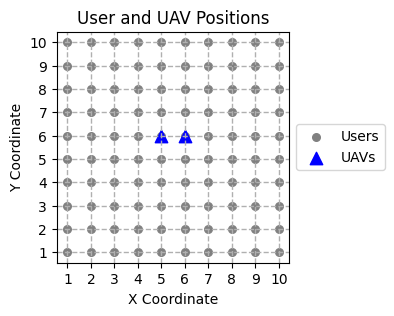


Iteration: 6, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(4, 4), (7, 4)], [(5, 5), (5, 4)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)], [(5, 5), (6, 5)]], 
all_utilities: [[0, 0], [[50, 50]], [[60, 40]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]]], 
stdev_list: [inf, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0], 
min(stdev_list): 0.0


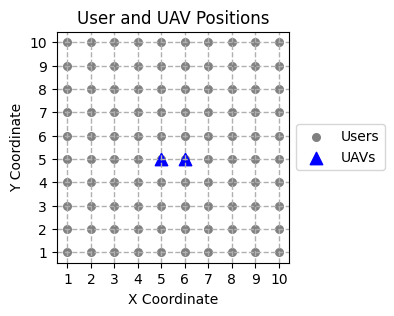


Iteration: 7, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(4, 4), (7, 4)], [(5, 5), (5, 4)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)]], 
all_utilities: [[0, 0], [[50, 50]], [[60, 40]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]]], 
stdev_list: [inf, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
min(stdev_list): 0.0


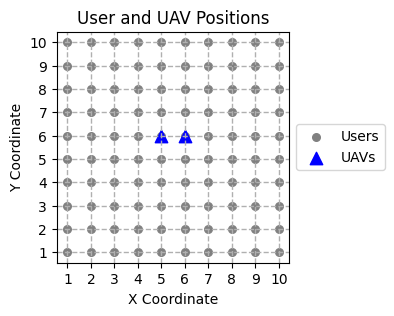


Iteration: 8, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(4, 4), (7, 4)], [(5, 5), (5, 4)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)], [(5, 5), (6, 5)]], 
all_utilities: [[0, 0], [[50, 50]], [[60, 40]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]]], 
stdev_list: [inf, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
min(stdev_list): 0.0


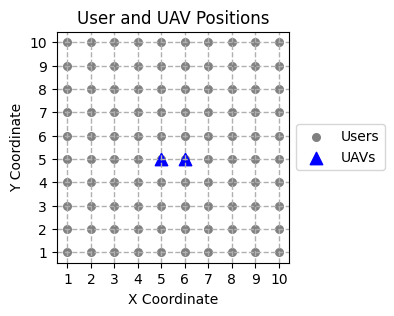


Iteration: 9, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(4, 4), (7, 4)], [(5, 5), (5, 4)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)]], 
all_utilities: [[0, 0], [[50, 50]], [[60, 40]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]]], 
stdev_list: [inf, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
min(stdev_list): 0.0


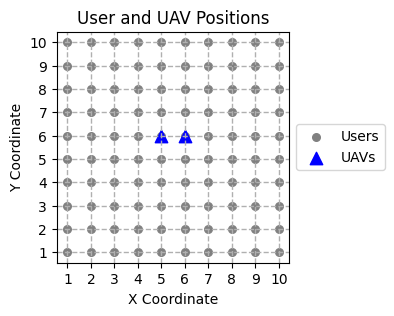


Iteration: 10, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(4, 4), (7, 4)], [(5, 5), (5, 4)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)], [(5, 5), (6, 5)]], 
all_utilities: [[0, 0], [[50, 50]], [[60, 40]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]]], 
stdev_list: [inf, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
min(stdev_list): 0.0


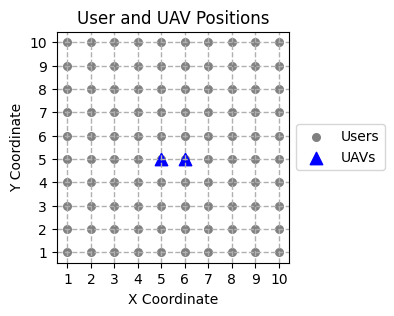


Iteration: 11, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(4, 4), (7, 4)], [(5, 5), (5, 4)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)], [(5, 5), (6, 5)], [(6, 6), (5, 6)]], 
all_utilities: [[0, 0], [[50, 50]], [[60, 40]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]], [[50, 50]]], 
stdev_list: [inf, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
min(stdev_list): 0.0
Best positions for minimum utility standard deviation: [(4, 4), (7, 4)], Utilities: [[50, 50]], StDev: 0.0


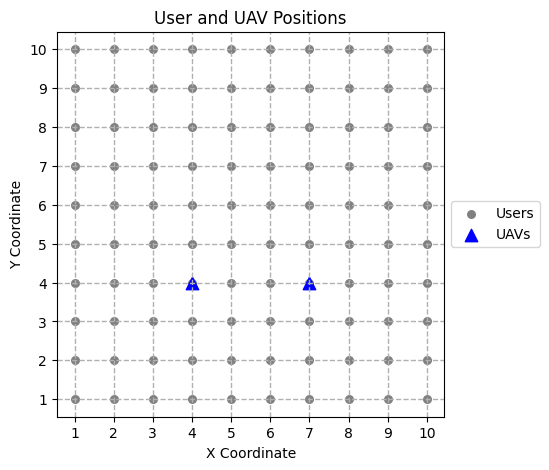

([(4, 4), (7, 4)], [[50, 50]])

In [85]:
ql = QLearningBestResponse(num_uav=2, m=10, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.1)
ql.train(num_episodes=1000)

ql.uav_positions = random.sample(ql.user_positions, ql.num_uav)
ql.run(max_iter=1000, max_dev_not_improved=10, verbose=False)

Iteration: 0


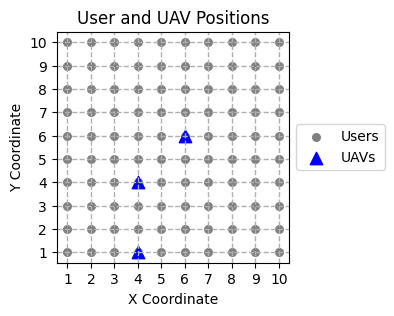


Iteration: 1, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)]], 
all_utilities: [[0, 0], [[20, 38, 42]]], 
stdev_list: [inf, 9.568466729604882], 
min(stdev_list): 9.568466729604882


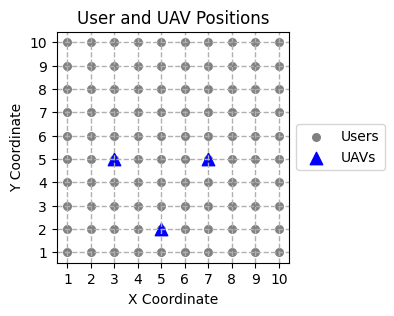


Iteration: 2, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773], 
min(stdev_list): 9.568466729604882


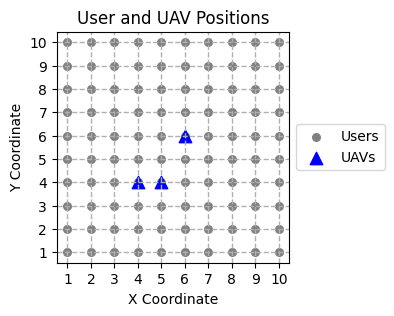


Iteration: 3, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356], 
min(stdev_list): 8.379870059984356


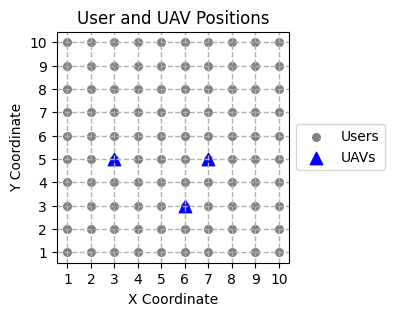


Iteration: 4, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]], [[24, 36, 40]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356, 6.79869268479038], 
min(stdev_list): 6.79869268479038


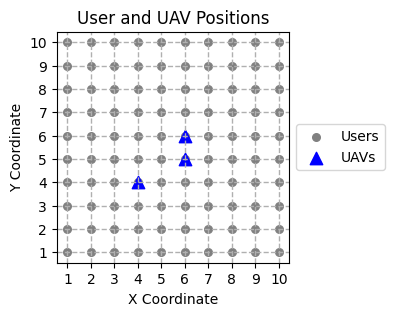


Iteration: 5, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]], [[24, 36, 40]], [[31, 44, 25]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356, 6.79869268479038, 7.93025150224688], 
min(stdev_list): 6.79869268479038


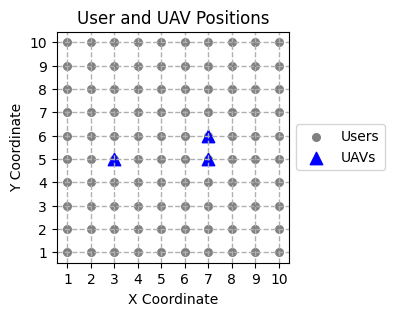


Iteration: 6, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356, 6.79869268479038, 7.93025150224688, 6.79869268479038], 
min(stdev_list): 6.79869268479038


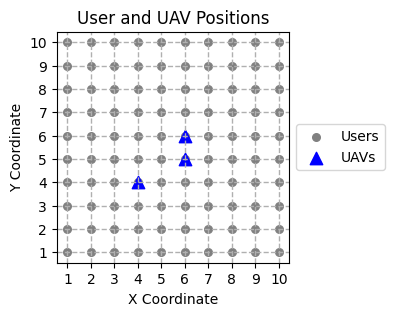


Iteration: 7, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.93025150224688], 
min(stdev_list): 6.79869268479038


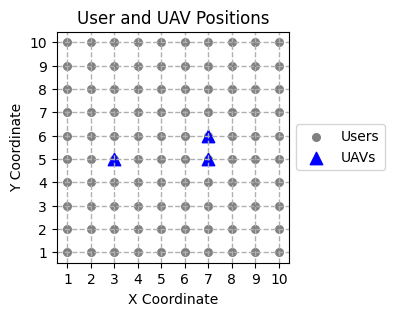


Iteration: 8, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (8, 4)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[32, 40, 28]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.93025150224688, 4.988876515698588], 
min(stdev_list): 4.988876515698588


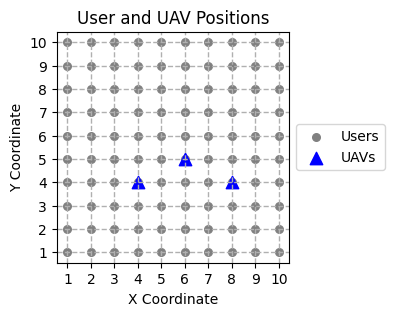


Iteration: 9, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (8, 4)], [(7, 6), (3, 5), (7, 5)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[32, 40, 28]], [[31, 44, 25]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.93025150224688, 4.988876515698588, 7.93025150224688], 
min(stdev_list): 4.988876515698588


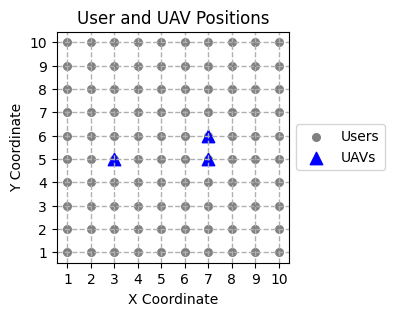


Iteration: 10, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (8, 4)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[32, 40, 28]], [[31, 44, 25]], [[24, 36, 40]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.93025150224688, 4.988876515698588, 7.93025150224688, 6.79869268479038], 
min(stdev_list): 4.988876515698588


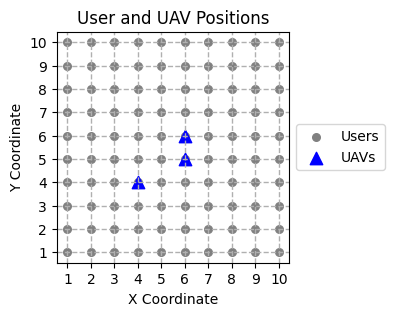


Iteration: 11, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (8, 4)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[32, 40, 28]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.93025150224688, 4.988876515698588, 7.93025150224688, 6.79869268479038, 7.93025150224688], 
min(stdev_list): 4.988876515698588


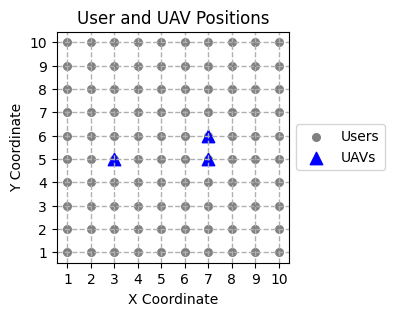


Iteration: 12, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (8, 4)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[32, 40, 28]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.93025150224688, 4.988876515698588, 7.93025150224688, 6.79869268479038, 7.93025150224688, 6.79869268479038], 
min(stdev_list): 4.988876515698588


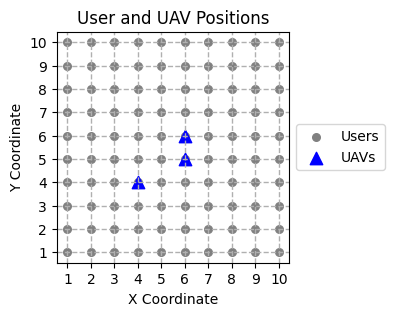


Iteration: 13, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (8, 4)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[32, 40, 28]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.93025150224688, 4.988876515698588, 7.93025150224688, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.93025150224688], 
min(stdev_list): 4.988876515698588


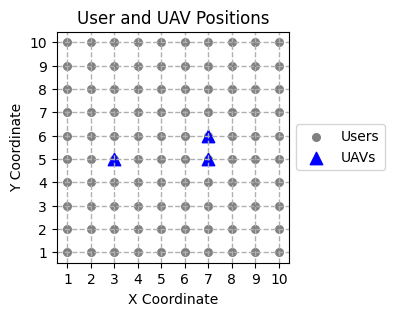


Iteration: 14, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (8, 4)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[32, 40, 28]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.93025150224688, 4.988876515698588, 7.93025150224688, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.93025150224688, 6.79869268479038], 
min(stdev_list): 4.988876515698588


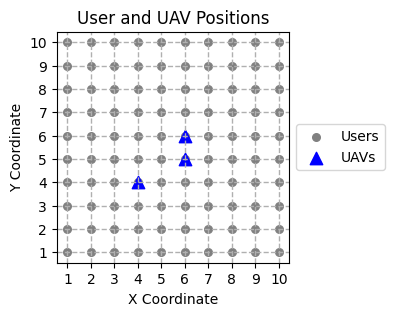


Iteration: 15, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (8, 4)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[32, 40, 28]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.93025150224688, 4.988876515698588, 7.93025150224688, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.930251

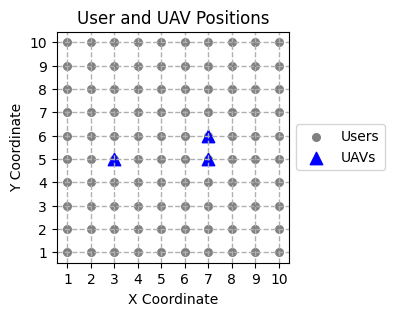


Iteration: 16, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (8, 4)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[32, 40, 28]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.93025150224688, 4.988876515698588, 7.93025150224688, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.

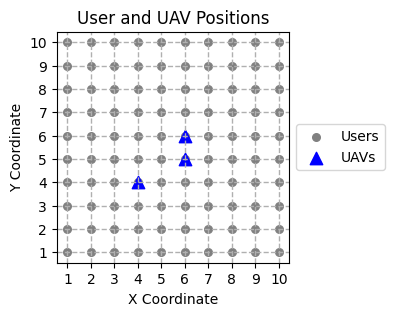


Iteration: 17, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (8, 4)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[32, 40, 28]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.93025150224688, 4.988876515698588, 7.93025150224688, 6.798692684790

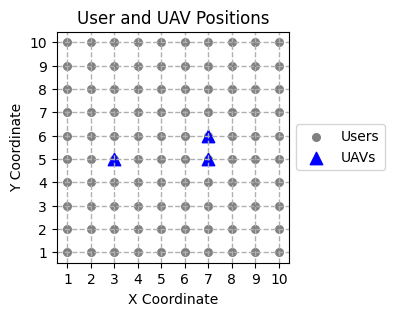


Iteration: 18, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 2), (3, 5), (7, 5)], [(5, 4), (4, 4), (6, 6)], [(6, 3), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (8, 4)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)], [(7, 6), (3, 5), (7, 5)], [(6, 5), (4, 4), (6, 6)]], 
all_utilities: [[0, 0], [[20, 38, 42]], [[21, 30, 49]], [[22, 42, 36]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[32, 40, 28]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]], [[31, 44, 25]], [[24, 36, 40]]], 
stdev_list: [inf, 9.568466729604882, 11.67142760000773, 8.379870059984356, 6.79869268479038, 7.93025150224688, 6.79869268479038, 7.93025150224688, 4.9888765

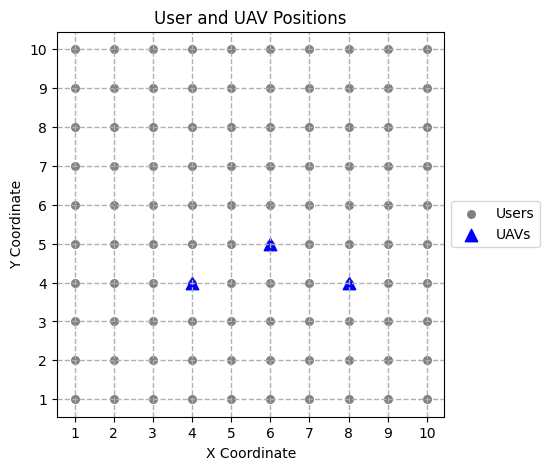

([(6, 5), (4, 4), (8, 4)], [[32, 40, 28]])

In [86]:
ql = QLearningBestResponse(num_uav=3, m=10, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.1)
ql.train(num_episodes=1000)

ql.uav_positions = random.sample(ql.user_positions, ql.num_uav)
ql.run(max_iter=1000, max_dev_not_improved=10, verbose=False)

Iteration: 0


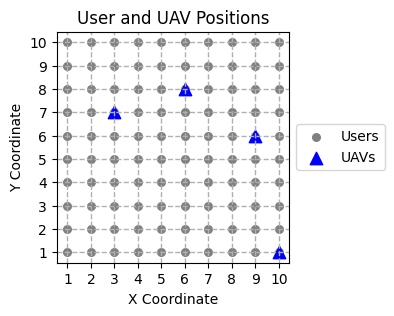


Iteration: 1, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]]], 
stdev_list: [inf, 9.433981132056603], 
min(stdev_list): 9.433981132056603


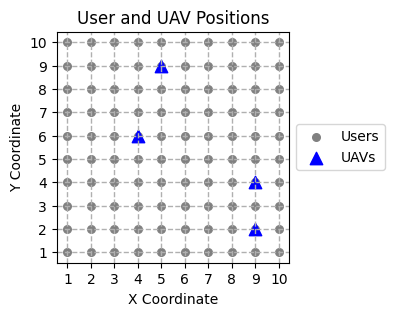


Iteration: 2, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]]], 
stdev_list: [inf, 9.433981132056603, 7.582875444051551], 
min(stdev_list): 7.582875444051551


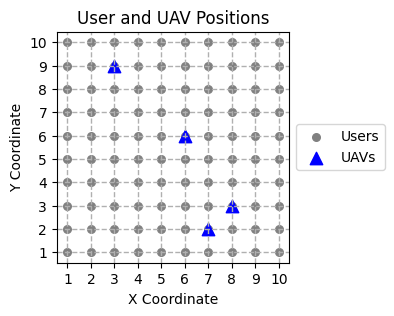


Iteration: 3, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]]], 
stdev_list: [inf, 9.433981132056603, 7.582875444051551, 11.575836902790225], 
min(stdev_list): 7.582875444051551


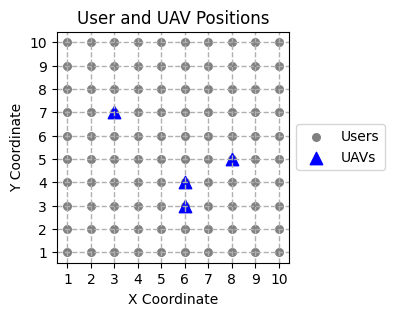


Iteration: 4, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)], [(4, 6), (5, 5), (8, 7), (5, 4)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]], [[31, 4, 33, 32]]], 
stdev_list: [inf, 9.433981132056603, 7.582875444051551, 11.575836902790225, 12.144957801491119], 
min(stdev_list): 7.582875444051551


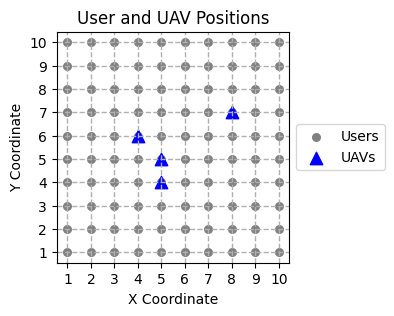


Iteration: 5, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)], [(4, 6), (5, 5), (8, 7), (5, 4)], [(6, 6), (6, 4), (6, 7), (6, 5)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]], [[31, 4, 33, 32]], [[10, 40, 40, 10]]], 
stdev_list: [inf, 9.433981132056603, 7.582875444051551, 11.575836902790225, 12.144957801491119, 15.0], 
min(stdev_list): 7.582875444051551


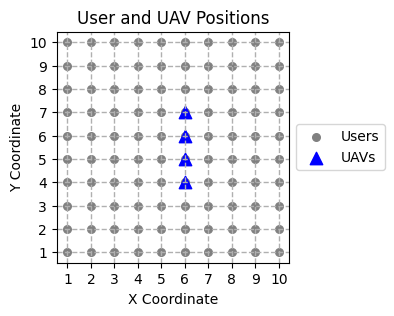


Iteration: 6, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)], [(4, 6), (5, 5), (8, 7), (5, 4)], [(6, 6), (6, 4), (6, 7), (6, 5)], [(5, 5), (4, 4), (5, 8), (5, 4)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]], [[31, 4, 33, 32]], [[10, 40, 40, 10]], [[15, 21, 40, 24]]], 
stdev_list: [inf, 9.433981132056603, 7.582875444051551, 11.575836902790225, 12.144957801491119, 15.0, 9.246621004453464], 
min(stdev_list): 7.582875444051551


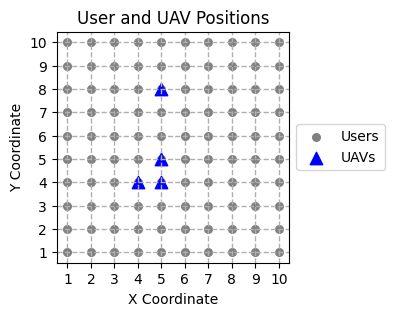


Iteration: 7, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)], [(4, 6), (5, 5), (8, 7), (5, 4)], [(6, 6), (6, 4), (6, 7), (6, 5)], [(5, 5), (4, 4), (5, 8), (5, 4)], [(6, 4), (5, 5), (4, 9), (5, 2)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]], [[31, 4, 33, 32]], [[10, 40, 40, 10]], [[15, 21, 40, 24]], [[29, 18, 32, 21]]], 
stdev_list: [inf, 9.433981132056603, 7.582875444051551, 11.575836902790225, 12.144957801491119, 15.0, 9.246621004453464, 5.70087712549569], 
min(stdev_list): 5.70087712549569


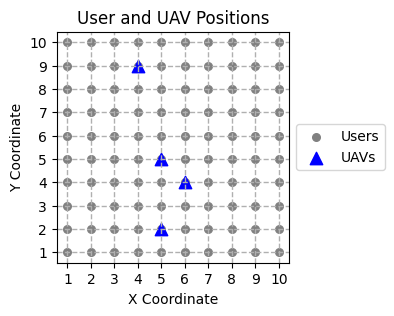


Iteration: 8, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)], [(4, 6), (5, 5), (8, 7), (5, 4)], [(6, 6), (6, 4), (6, 7), (6, 5)], [(5, 5), (4, 4), (5, 8), (5, 4)], [(6, 4), (5, 5), (4, 9), (5, 2)], [(4, 4), (6, 4), (3, 8), (6, 3)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]], [[31, 4, 33, 32]], [[10, 40, 40, 10]], [[15, 21, 40, 24]], [[29, 18, 32, 21]], [[23, 26, 32, 19]]], 
stdev_list: [inf, 9.433981132056603, 7.582875444051551, 11.575836902790225, 12.144957801491119, 15.0, 9.246621004453464, 5.70087712549569, 4.743416490252569], 
min(stdev_list): 4.743416490252569


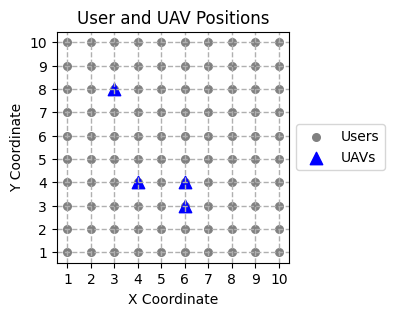


Iteration: 9, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)], [(4, 6), (5, 5), (8, 7), (5, 4)], [(6, 6), (6, 4), (6, 7), (6, 5)], [(5, 5), (4, 4), (5, 8), (5, 4)], [(6, 4), (5, 5), (4, 9), (5, 2)], [(4, 4), (6, 4), (3, 8), (6, 3)], [(5, 5), (4, 4), (4, 7), (5, 4)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]], [[31, 4, 33, 32]], [[10, 40, 40, 10]], [[15, 21, 40, 24]], [[29, 18, 32, 21]], [[23, 26, 32, 19]], [[19, 19, 38, 24]]], 
stdev_list: [inf, 9.433981132056603, 7.582875444051551, 11.575836902790225, 12.144957801491119, 15.0, 9.246621004453464, 5.70087712549569, 4.743416490252569, 7.7781745930520225], 
min(stdev_list): 4.743416490252569


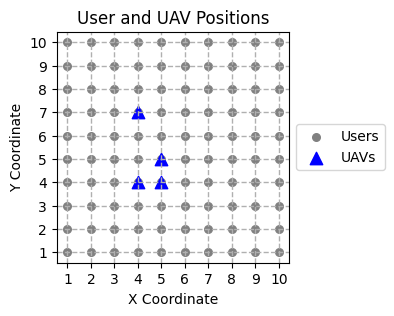


Iteration: 10, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)], [(4, 6), (5, 5), (8, 7), (5, 4)], [(6, 6), (6, 4), (6, 7), (6, 5)], [(5, 5), (4, 4), (5, 8), (5, 4)], [(6, 4), (5, 5), (4, 9), (5, 2)], [(4, 4), (6, 4), (3, 8), (6, 3)], [(5, 5), (4, 4), (4, 7), (5, 4)], [(6, 4), (5, 5), (5, 6), (6, 5)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]], [[31, 4, 33, 32]], [[10, 40, 40, 10]], [[15, 21, 40, 24]], [[29, 18, 32, 21]], [[23, 26, 32, 19]], [[19, 19, 38, 24]], [[30, 15, 40, 15]]], 
stdev_list: [inf, 9.433981132056603, 7.582875444051551, 11.575836902790225, 12.144957801491119, 15.0, 9.246621004453464, 5.70087712549569, 4.743416490252569, 7.7781745930520225, 10.606601717798213], 
min(stdev_list): 4.743416490252569


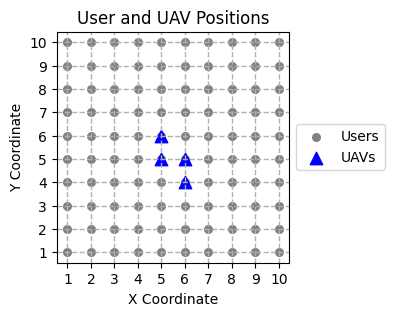


Iteration: 11, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)], [(4, 6), (5, 5), (8, 7), (5, 4)], [(6, 6), (6, 4), (6, 7), (6, 5)], [(5, 5), (4, 4), (5, 8), (5, 4)], [(6, 4), (5, 5), (4, 9), (5, 2)], [(4, 4), (6, 4), (3, 8), (6, 3)], [(5, 5), (4, 4), (4, 7), (5, 4)], [(6, 4), (5, 5), (5, 6), (6, 5)], [(4, 4), (6, 4), (7, 6), (5, 4)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]], [[31, 4, 33, 32]], [[10, 40, 40, 10]], [[15, 21, 40, 24]], [[29, 18, 32, 21]], [[23, 26, 32, 19]], [[19, 19, 38, 24]], [[30, 15, 40, 15]], [[35, 19, 41, 5]]], 
stdev_list: [inf, 9.433981132056603, 7.582875444051551, 11.575836902790225, 12.144957801491119, 15.0, 9.246621004453464, 5.70087712549569, 4.743416490252569, 7.7781745930520225, 10.606601717798213, 14.071247279470288], 
min(stdev_list): 4.743416490252569


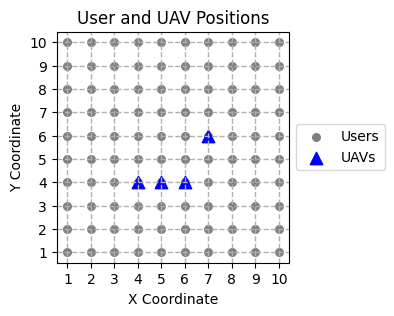


Iteration: 12, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)], [(4, 6), (5, 5), (8, 7), (5, 4)], [(6, 6), (6, 4), (6, 7), (6, 5)], [(5, 5), (4, 4), (5, 8), (5, 4)], [(6, 4), (5, 5), (4, 9), (5, 2)], [(4, 4), (6, 4), (3, 8), (6, 3)], [(5, 5), (4, 4), (4, 7), (5, 4)], [(6, 4), (5, 5), (5, 6), (6, 5)], [(4, 4), (6, 4), (7, 6), (5, 4)], [(5, 5), (4, 4), (6, 5), (6, 3)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]], [[31, 4, 33, 32]], [[10, 40, 40, 10]], [[15, 21, 40, 24]], [[29, 18, 32, 21]], [[23, 26, 32, 19]], [[19, 19, 38, 24]], [[30, 15, 40, 15]], [[35, 19, 41, 5]], [[25, 21, 35, 19]]], 
stdev_list: [inf, 9.433981132056603, 7.582875444051551, 11.575836902790225, 12.144957801491119, 15.0, 9.246621004453464, 5.70087712549569, 4.743416490252569, 7.7781745930520225, 10.606601717798213, 14.071247279470288, 6.164414002968976], 
min(stdev_list): 4.743416490

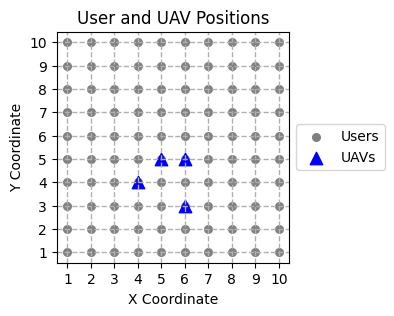


Iteration: 13, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)], [(4, 6), (5, 5), (8, 7), (5, 4)], [(6, 6), (6, 4), (6, 7), (6, 5)], [(5, 5), (4, 4), (5, 8), (5, 4)], [(6, 4), (5, 5), (4, 9), (5, 2)], [(4, 4), (6, 4), (3, 8), (6, 3)], [(5, 5), (4, 4), (4, 7), (5, 4)], [(6, 4), (5, 5), (5, 6), (6, 5)], [(4, 4), (6, 4), (7, 6), (5, 4)], [(5, 5), (4, 4), (6, 5), (6, 3)], [(6, 4), (5, 5), (5, 4), (6, 5)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]], [[31, 4, 33, 32]], [[10, 40, 40, 10]], [[15, 21, 40, 24]], [[29, 18, 32, 21]], [[23, 26, 32, 19]], [[19, 19, 38, 24]], [[30, 15, 40, 15]], [[35, 19, 41, 5]], [[25, 21, 35, 19]], [[20, 30, 20, 30]]], 
stdev_list: [inf, 9.433981132056603, 7.582875444051551, 11.575836902790225, 12.144957801491119, 15.0, 9.246621004453464, 5.70087712549569, 4.743416490252569, 7.7781745930520225, 10.606601717798213, 14.071247279470

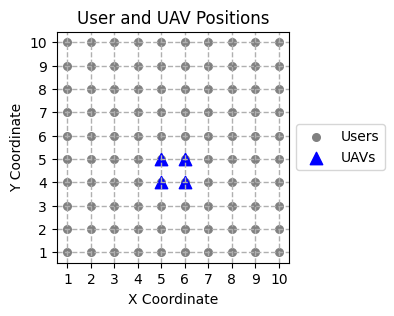


Iteration: 14, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)], [(4, 6), (5, 5), (8, 7), (5, 4)], [(6, 6), (6, 4), (6, 7), (6, 5)], [(5, 5), (4, 4), (5, 8), (5, 4)], [(6, 4), (5, 5), (4, 9), (5, 2)], [(4, 4), (6, 4), (3, 8), (6, 3)], [(5, 5), (4, 4), (4, 7), (5, 4)], [(6, 4), (5, 5), (5, 6), (6, 5)], [(4, 4), (6, 4), (7, 6), (5, 4)], [(5, 5), (4, 4), (6, 5), (6, 3)], [(6, 4), (5, 5), (5, 4), (6, 5)], [(4, 4), (6, 4), (6, 3), (5, 4)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]], [[31, 4, 33, 32]], [[10, 40, 40, 10]], [[15, 21, 40, 24]], [[29, 18, 32, 21]], [[23, 26, 32, 19]], [[19, 19, 38, 24]], [[30, 15, 40, 15]], [[35, 19, 41, 5]], [[25, 21, 35, 19]], [[20, 30, 20, 30]], [[39, 35, 19, 7]]], 
stdev_list: [inf, 9.433981132056603, 7.582875444051551, 11.575836902790225, 12.144957801491119, 15.0, 9.246621004453464, 5.70087712549569, 4.743416490252569, 7.

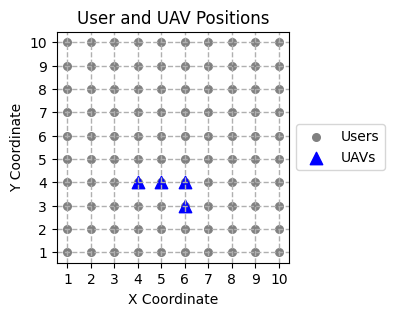


Iteration: 15, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)], [(4, 6), (5, 5), (8, 7), (5, 4)], [(6, 6), (6, 4), (6, 7), (6, 5)], [(5, 5), (4, 4), (5, 8), (5, 4)], [(6, 4), (5, 5), (4, 9), (5, 2)], [(4, 4), (6, 4), (3, 8), (6, 3)], [(5, 5), (4, 4), (4, 7), (5, 4)], [(6, 4), (5, 5), (5, 6), (6, 5)], [(4, 4), (6, 4), (7, 6), (5, 4)], [(5, 5), (4, 4), (6, 5), (6, 3)], [(6, 4), (5, 5), (5, 4), (6, 5)], [(4, 4), (6, 4), (6, 3), (5, 4)], [(5, 3), (5, 5), (6, 5), (6, 3)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]], [[31, 4, 33, 32]], [[10, 40, 40, 10]], [[15, 21, 40, 24]], [[29, 18, 32, 21]], [[23, 26, 32, 19]], [[19, 19, 38, 24]], [[30, 15, 40, 15]], [[35, 19, 41, 5]], [[25, 21, 35, 19]], [[20, 30, 20, 30]], [[39, 35, 19, 7]], [[20, 30, 35, 15]]], 
stdev_list: [inf, 9.433981132056603, 7.582875444051551, 11.575836902790225, 12.144957801491119, 15.0, 9.24

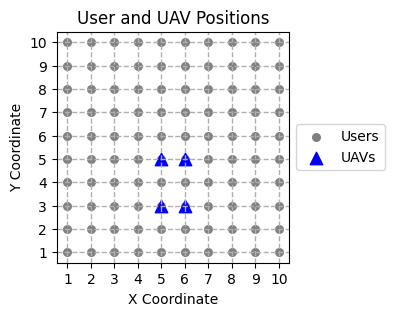


Iteration: 16, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)], [(4, 6), (5, 5), (8, 7), (5, 4)], [(6, 6), (6, 4), (6, 7), (6, 5)], [(5, 5), (4, 4), (5, 8), (5, 4)], [(6, 4), (5, 5), (4, 9), (5, 2)], [(4, 4), (6, 4), (3, 8), (6, 3)], [(5, 5), (4, 4), (4, 7), (5, 4)], [(6, 4), (5, 5), (5, 6), (6, 5)], [(4, 4), (6, 4), (7, 6), (5, 4)], [(5, 5), (4, 4), (6, 5), (6, 3)], [(6, 4), (5, 5), (5, 4), (6, 5)], [(4, 4), (6, 4), (6, 3), (5, 4)], [(5, 3), (5, 5), (6, 5), (6, 3)], [(6, 4), (7, 5), (5, 4), (6, 5)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]], [[31, 4, 33, 32]], [[10, 40, 40, 10]], [[15, 21, 40, 24]], [[29, 18, 32, 21]], [[23, 26, 32, 19]], [[19, 19, 38, 24]], [[30, 15, 40, 15]], [[35, 19, 41, 5]], [[25, 21, 35, 19]], [[20, 30, 20, 30]], [[39, 35, 19, 7]], [[20, 30, 35, 15]], [[14, 30, 35, 21]]], 
stdev_list: [inf, 9.433981132056603, 7.5828754440515

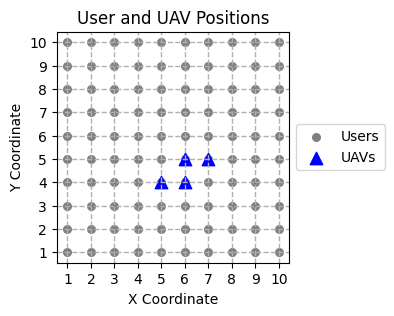


Iteration: 17, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)], [(4, 6), (5, 5), (8, 7), (5, 4)], [(6, 6), (6, 4), (6, 7), (6, 5)], [(5, 5), (4, 4), (5, 8), (5, 4)], [(6, 4), (5, 5), (4, 9), (5, 2)], [(4, 4), (6, 4), (3, 8), (6, 3)], [(5, 5), (4, 4), (4, 7), (5, 4)], [(6, 4), (5, 5), (5, 6), (6, 5)], [(4, 4), (6, 4), (7, 6), (5, 4)], [(5, 5), (4, 4), (6, 5), (6, 3)], [(6, 4), (5, 5), (5, 4), (6, 5)], [(4, 4), (6, 4), (6, 3), (5, 4)], [(5, 3), (5, 5), (6, 5), (6, 3)], [(6, 4), (7, 5), (5, 4), (6, 5)], [(5, 5), (6, 6), (6, 3), (5, 4)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]], [[31, 4, 33, 32]], [[10, 40, 40, 10]], [[15, 21, 40, 24]], [[29, 18, 32, 21]], [[23, 26, 32, 19]], [[19, 19, 38, 24]], [[30, 15, 40, 15]], [[35, 19, 41, 5]], [[25, 21, 35, 19]], [[20, 30, 20, 30]], [[39, 35, 19, 7]], [[20, 30, 35, 15]], [[14, 30, 35, 21]], [[21, 39, 26, 14]]],

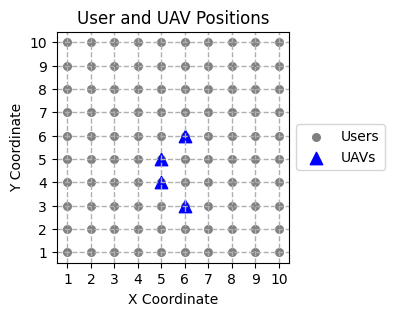


Iteration: 18, 
all_uav_positions_list: [[(0, 0), (0, 0)], [(5, 9), (4, 6), (9, 4), (9, 2)], [(3, 9), (6, 6), (8, 3), (7, 2)], [(3, 7), (6, 4), (8, 5), (6, 3)], [(4, 6), (5, 5), (8, 7), (5, 4)], [(6, 6), (6, 4), (6, 7), (6, 5)], [(5, 5), (4, 4), (5, 8), (5, 4)], [(6, 4), (5, 5), (4, 9), (5, 2)], [(4, 4), (6, 4), (3, 8), (6, 3)], [(5, 5), (4, 4), (4, 7), (5, 4)], [(6, 4), (5, 5), (5, 6), (6, 5)], [(4, 4), (6, 4), (7, 6), (5, 4)], [(5, 5), (4, 4), (6, 5), (6, 3)], [(6, 4), (5, 5), (5, 4), (6, 5)], [(4, 4), (6, 4), (6, 3), (5, 4)], [(5, 3), (5, 5), (6, 5), (6, 3)], [(6, 4), (7, 5), (5, 4), (6, 5)], [(5, 5), (6, 6), (6, 3), (5, 4)], [(6, 4), (5, 5), (6, 5), (4, 5)]], 
all_utilities: [[0, 0], [[28, 38, 22, 12]], [[28, 36, 17, 19]], [[37, 7, 33, 23]], [[31, 4, 33, 32]], [[10, 40, 40, 10]], [[15, 21, 40, 24]], [[29, 18, 32, 21]], [[23, 26, 32, 19]], [[19, 19, 38, 24]], [[30, 15, 40, 15]], [[35, 19, 41, 5]], [[25, 21, 35, 19]], [[20, 30, 20, 30]], [[39, 35, 19, 7]], [[20, 30, 35, 15]], [[14, 

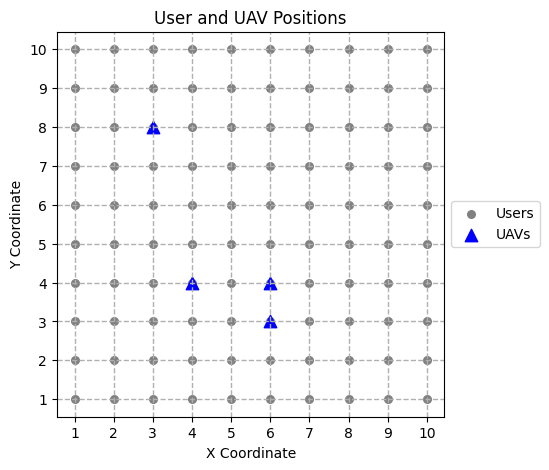

([(4, 4), (6, 4), (3, 8), (6, 3)], [[23, 26, 32, 19]])

In [88]:
ql = QLearningBestResponse(num_uav=4, m=10, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.1)
ql.train(num_episodes=1000)

ql.uav_positions = random.sample(ql.user_positions, ql.num_uav)
ql.run(max_iter=1000, max_dev_not_improved=10, verbose=False)

- The best response learning model saves on training time because it does not need to learn the set of all possible moves to consider when making the next best move, it simply checks the most ideal next move based on the utility of the UAVs for the next move and not future moves.
- The Q learning model needs to discount for future moves' rewards, thus require training with a set number of episodes. This leads to longer initial run time due to the training process which attempts to learn the set of optimal moves that maximize future utilities for the UAVs. The current Q learning model may also require retraining when the number of UAV changes to improve performance, thus increases computational time at the initial phase.
-As the grid size (m) scales larger, it becomes more computational expensive to train the Q learning model. The Q learning model is also heavily dependent on the q table which contains the set of q values, that determine the action to take for a given state. This means it's vital to have enough training episodes for the optimal actions to be learned, otherwise random actions will be selected. While training takes up more time initially, later computation of the action in the Q learning model is more efficient than the BRL model because the Q values are stored in a lookup table and the action can be quickly obtained rather than having to compute the utilities to determine the best next action for each time step.
- For a set of fixed starting positions of the UAVs, it appears that without sufficient training of the Q learning model, the BRL model outperforms it. However, increasing the number of training episodes can improve the performance of the Q learning model to surpass that of the BRL model.
- The obtained equilibrium outcomes are still not socially optimal, thus as we see in socially optimal results below, the utilities of the users in a socially optimal case when m=100 with 2 UAVs is still significantly better than the results from both models. However, as expected, the users' total utility improves as the number of UAVs increases.

## Best Response Learning (m = 100)

In [74]:
## Best Response Learning
brl2 = BestResponseLearning(num_uav=2, m=100)

In [75]:
# Generate some random fixed UAV positions of different number of UAVs
num_uavs = [2, 4]
uav_positions_fixed = []

for uav in num_uavs:
    uav_positions_fixed.append(random.sample(brl2.user_positions, uav))
print(uav_positions_fixed)

[[(63, 61), (99, 17)], [(81, 42), (25, 21), (65, 20), (79, 19)]]


In [ ]:
brl_results = {"num_uav": [], "run_time": [], "uav_position": [], "uav_utility": [], "user_utility": [], "user_total_utility": []}

for i in range(len(num_uavs)):
    start_time = time.time()
    # Set the number of UAVs
    brl2.num_uav = num_uavs[i]
    # Set the UAVs fixed position
    brl2.uav_positions = copy.deepcopy(uav_positions_fixed[i])
    # Get the best UAV positions and utilities
    best_uav_position, _ = brl2.run(max_iter=1000, max_dev_not_improved=20, verbose=False)
    # Get the user and uav utility
    user_total_utility = brl2.compute_user_utility_by_uav(best_uav_position)
    uav_total_utility = [brl2.connect_users_to_uavs_original(position, uav_positions_fixed[i]) for position in uav_positions_fixed[i]]
    # Store results into a dictionary
    brl_results["num_uav"].append(num_uavs[i])
    brl_results["uav_position"].append(best_uav_position)
    brl_results["uav_utility"].append(uav_total_utility)
    brl_results["user_utility"].append(user_total_utility)
    brl_results["user_total_utility"].append(np.sum(list(user_total_utility.values())))

    end_time = time.time()
    brl_results["run_time"].append(end_time - start_time)

In [77]:
pd.DataFrame(brl_results)

,num_uav,run_time,uav_position,uav_utility,user_utility,user_total_utility
0,2,58.618776,"[(63, 61), (99, 17)]","[8188.0, 1812.0]","{(63, 61): -318182.19342, (99, 17): -46811.40467}",-364993.59809
1,4,476.761732,"[(50, 71), (34, 62), (51, 30), (67, 39)]","[4029, 4030, 1093, 848]","{(51, 30): -63410.04943, (34, 62): -60548.5514, (50, 71): -63410.04943, (67, 39): -60548.5514}",-247917.20166


## QLearning (m = 100); Number of training episodes = 10

In [ ]:
## Reinforcement Learning
rl_results2 = {"num_uav": [], "run_time": [], "uav_position": [], "uav_utility": [], "user_utility": [], "user_total_utility": []}

for i in range(len(num_uavs)):
    ## Training
    rl2 = QLearningBestResponse(num_uav=num_uavs[i], m=100, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.1)
    rl2.train(num_episodes=10)

    start_time = time.time()
    # Set the number of UAVs
    rl2.num_uav = num_uavs[i]
    # Set the UAVs fixed position
    rl2.uav_positions = copy.deepcopy(uav_positions_fixed[i])
    #print(f"num_uavs {num_uavs}, uav_positions_fixed {uav_positions_fixed}, rl2.num_uav {rl2.num_uav}, rl2.uav_positions {rl2.uav_positions}")
    # Get the best UAV positions and utilities
    best_uav_position, _ = rl2.run(max_iter=1000, max_dev_not_improved=20, verbose=False)
    # Get the user and uav utility
    user_total_utility = rl2.compute_user_utility_by_uav(best_uav_position)
    uav_total_utility = [rl2.connect_users_to_uavs_original(position, uav_positions_fixed[i]) for position in uav_positions_fixed[i]]
    # Store results into a dictionary
    rl_results2["num_uav"].append(num_uavs[i])
    rl_results2["uav_position"].append(best_uav_position)
    rl_results2["uav_utility"].append(uav_total_utility)
    rl_results2["user_utility"].append(user_total_utility)
    rl_results2["user_total_utility"].append(np.sum(list(user_total_utility.values())))

    end_time = time.time()
    rl_results2["run_time"].append(end_time - start_time)

In [79]:
pd.DataFrame(rl_results2)

,num_uav,run_time,uav_position,uav_utility,user_utility,user_total_utility
0,2,95.924229,"[(76, 92), (99, 49)]","[8188.0, 1812.0]","{(99, 49): -247157.41333, (76, 92): -224518.67046}",-471676.08379
1,4,69.011466,"[(91, 48), (30, 30), (64, 39), (82, 30)]","[4029, 4030, 1093, 848]","{(30, 30): -132219.83154, (64, 39): -73143.39318, (82, 30): -23161.58962, (91, 48): -56794.17257}",-285318.98691


## QLearning (m = 100); Increasing the number of training episodes

In [ ]:
## Reinforcement Learning
rl_results3 = {"num_uav": [], "run_time": [], "uav_position": [], "uav_utility": [], "user_utility": [], "user_total_utility": []}

for i in range(len(num_uavs)):
    # Train
    rl3 = QLearningBestResponse(num_uav=num_uavs[i], m=100, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.1)
    rl3.train(num_episodes=200)

    start_time = time.time()
    # Set the number of UAVs
    rl3.num_uav = num_uavs[i]
    # Set the UAVs fixed position
    rl3.uav_positions = copy.deepcopy(uav_positions_fixed[i])
    # Get the best UAV positions and utilities
    best_uav_position, _ = rl3.run(max_iter=1000, max_dev_not_improved=20, verbose=False)
    # Get the user and uav utility
    user_total_utility = rl3.compute_user_utility_by_uav(best_uav_position)
    uav_total_utility = [rl3.connect_users_to_uavs_original(position, uav_positions_fixed[i]) for position in uav_positions_fixed[i]]
    # Store results into a dictionary
    # Store results into a dictionary
    rl_results3["num_uav"].append(num_uavs[i])
    rl_results3["uav_position"].append(best_uav_position)
    rl_results3["uav_utility"].append(uav_total_utility)
    rl_results3["user_utility"].append(user_total_utility)
    rl_results3["user_total_utility"].append(np.sum(list(user_total_utility.values())))

    end_time = time.time()
    rl_results3["run_time"].append(end_time - start_time)

In [85]:
pd.DataFrame(rl_results3)

,num_uav,run_time,uav_position,uav_utility,user_utility,user_total_utility
0,2,113.997071,"[(66, 98), (100, 58)]","[8188.0, 1812.0]","{(100, 58): -244962.02721, (66, 98): -236212.84434}",-481174.87155
1,4,68.804844,"[(92, 49), (31, 33), (63, 38), (85, 31)]","[4029, 4030, 1093, 848]","{(31, 33): -139735.09297, (63, 38): -63811.57461, (92, 49): -58513.52139, (85, 31): -20780.40734}",-282840.59631


### Socially Optimal Solution for 2 UAVs

In [86]:
for positions in social_opt_position(m=100):
    print(f"UAV Position: {positions}, UAV Utility: {[brl2.connect_users_to_uavs_original(position, positions) for position in positions]}, User Utility: {brl2.compute_user_utility_by_uav(positions)}, Total User Utility: {np.sum(list(brl2.compute_user_utility_by_uav(positions).values()))}")

UAV Position: [(25, 50), (76, 51)], UAV Utility: [5000.0, 5000.0], User Utility: {(25, 50): -148322.00202, (76, 51): -148322.00202}, Total User Utility: -296644.00404
UAV Position: [(25, 51), (76, 50)], UAV Utility: [5000.0, 5000.0], User Utility: {(25, 51): -148322.00202, (76, 50): -148322.00202}, Total User Utility: -296644.00404
UAV Position: [(50, 25), (51, 76)], UAV Utility: [5000.0, 5000.0], User Utility: {(50, 25): -148322.00202, (51, 76): -148322.00202}, Total User Utility: -296644.00404
UAV Position: [(50, 76), (51, 25)], UAV Utility: [5000.0, 5000.0], User Utility: {(51, 25): -148322.00202, (50, 76): -148322.00202}, Total User Utility: -296644.00404


It is possible to coordinate the competing UAV nodes into a socially optimal outcome by altering the objective function. The original objective function was based on the maximization of total utility for the UAVs, derived from counting the number of users connected to each uav based on their relevative minimum distance, thus resulted in the UAVs aggregating close to the center region and close to one another. The updated approach seek to maximize user utility as the objective instead, by minimizing the sum of the users' distance to the nearest uav. Therefore, user utility is presented as a negative value because maximizing this value result in the minimum total distance. As shown in the results below, it can be seen that changing this objective function lead to the UAVs moving in the direction that would lead to better user outcome

## QLearningBestResponse_optimal

In [87]:
class QLearningBestResponse_optimal:
    """
    Initialize the QLearningBestResponse_optimal class.

    Args:
        num_uav (int): Number of UAVs.
        m (int): Grid size (m x m).
        learning_rate (float): Learning rate for Q-learning.
        discount_factor (float): Discount factor for future rewards.
        exploration_prob (float): Probability of taking a random action.
        verbose (bool): Whether to print verbose information.
    """
    def __init__(self, num_uav, m, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.1, verbose=False):
        self.num_uav = num_uav
        self.m = m
        self.user_positions = [(x, y) for x in range(1, self.m + 1) for y in range(1, self.m + 1)]
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_prob = exploration_prob

        if self.num_uav > len(self.user_positions):
            raise ValueError("The number of UAVs exceeds the maximum possible unique positions.")

        self.uav_positions = random.sample(self.user_positions, self.num_uav)
        self.q_table = {k: {"N": 0, "E": 0, "S": 0, "W": 0} for k in self.user_positions} #{}  # Q-table to store Q-values
        self.verbose = verbose


    def plot_user_and_uav_positions(self):
        """
        Plot the user and UAV positions on a grid.
        """
        # Extract x and y coordinates for users and UAVs
        user_x, user_y = zip(*self.user_positions)
        uav_x, uav_y = zip(*self.uav_positions)
        # Create a plot to display user and UAV positions
        plt.figure(figsize=(3, 3))
        plt.scatter(user_x, user_y, color='grey', label='Users', marker='o', s=30)
        plt.scatter(uav_x, uav_y, color='blue', label='UAVs', marker='^', s=80)
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title('User and UAV Positions')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        # Set the grid to show 10x10 with 1 spacing
        plt.xticks(range(1, self.m + 1))
        plt.yticks(range(1, self.m + 1))
        plt.grid(True, which='both', linestyle='--', lw=1)
        plt.show()

    def get_valid_new_state(self, state, max_attempts=10):
        """
        Get a valid new state for a given state.

        Args:
            state (tuple): Current state.
            max_attempts (int): Maximum attempts to find a valid new state.

        Returns:
            tuple: Valid new state.
        """
        # Find the action with the highest Q-value
        max_action = max(self.q_table[state], key=self.q_table[state].get)
        new_state = self.move(state, max_action)
        attempts = 0

        while new_state in self.uav_positions and attempts < max_attempts:
            # If there's an overlap, keep trying different new states based on Q-values until a valid one is found
            actions = sorted(self.q_table[state], key=lambda k: self.q_table[state][k], reverse=True)
            actions.remove(max_action)  # Remove the current max action

            for action in actions:
                new_state = self.move(state, action)
                if new_state not in self.uav_positions:
                    return new_state
            attempts += 1

        return new_state

    def move(self, position, direction):
        """
        Move from a current position to a new position based on a given direction.

        Args:
            position (tuple): Current position.
            direction (str): Direction to move ('N', 'E', 'S', 'W').

        Returns:
            tuple: New position after the move.
        """
        x, y = position
        if direction == 'N':
            new_position = (x, y + 1)
        elif direction == 'E':
            new_position = (x + 1, y)
        elif direction == 'S':
            new_position = (x, y - 1)
        elif direction == 'W':
            new_position = (x - 1, y)
        else:
            raise ValueError("Invalid direction")

        # Check if the new position is within the grid boundaries
        new_x, new_y = new_position
        if 1 <= new_x <= self.m and 1 <= new_y <= self.m:
            return new_position
        else:
            return position  # Return the current position if it's outside the boundaries

    def euclidean_distance(self, point1, point2):
        """
        Calculate the Euclidean distance between two points.

        Args:
            point1 (tuple): First point (x, y).
            point2 (tuple): Second point (x, y).

        Returns:
            float: Euclidean distance between the two points.
        """
        x1, y1 = point1
        x2, y2 = point2
        return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

    def update_uav_positions(self, tuples_list, target_position, new_tuple):
        """
        Update the UAV positions list by replacing a target position with a new position.

        Args:
            tuples_list (list of tuples): List of tuples representing UAV positions.
            target_position (tuple): Position to be replaced.
            new_tuple (tuple): New position to replace the target position.
        """
        for i, t in enumerate(tuples_list):
            if t == target_position:
                tuples_list[i] = new_tuple
        return tuples_list

    def connect_users_to_uavs_original(self, curr_uav_position, uav_positions_):
        """
        Calculate the number of users connected to a specific UAV. The utility of the UAVs.

        Args:
            curr_uav_position (tuple): Current UAV position.
            uav_positions_ (list of tuples): List of UAV positions.

        Returns:
            int: Number of users connected to the current UAV.
        """
        users_connected_to_uav = {p: 0 for p in uav_positions_}

        for user_position in self.user_positions:
            # Find the index of the closest UAV based on minimum Euclidean distance
            #print("user_position", user_position)
            dist = []
            for uav_position in uav_positions_:
                dist.append(self.euclidean_distance(user_position, uav_position))
                #print(f"user_position:{user_position}, uav_position: {uav_position}, euclidean_distance:{euclidean_distance(user_position, uav_position)}, dist: {dist}")
            if len(set(dist)) == 1: # All distances are the same
                #print(f"len(set(dist)) == 1: {len(set(dist)) == 1:}")
                for uav_position in uav_positions_:
                    users_connected_to_uav[uav_position] += 1/len(uav_positions_)
                #print(f"users_connected_to_uav: {users_connected_to_uav}")
            else:
                #print("else:")
                uav_idex = np.argmin(dist)
                users_connected_to_uav[uav_positions_[uav_idex]] += 1
                #print(f"users_connected_to_uav: {users_connected_to_uav}")

        return users_connected_to_uav[curr_uav_position]

    def connect_users_to_uavs(self, uav_positions_):
        """
        Calculate the utility based on the total distances of all users relative to the UAVs. Modified objective for social optimality

        Args:
            uav_positions_ (list of tuples): List of UAV positions.

        Returns:
            float: Total distance-based utility.
        """
        total_distance_utility = 0.0

        for user_position in self.user_positions:
            min_distance = float('inf')

            for uav_position in uav_positions_:
                distance = self.euclidean_distance(user_position, uav_position)
                if distance < min_distance:
                    min_distance = distance

            total_distance_utility += min_distance

        return total_distance_utility

    def compute_user_utility_by_uav(self, uav_positions_):
        """
        Calculate the utility based on the total distances of all users relative to the UAVs.

        Args:
            uav_positions_ (list of tuples): List of UAV positions.

        Returns:
            dict: Dictionary with UAV positions as keys and their respective total distance-based utility as values.
        """
        uav_total_utility = {}
        for user_position in self.user_positions:
            uav_distances = []
            uav_positions = []
            for uav_position in uav_positions_:
                uav_distances.append(self.euclidean_distance(user_position, uav_position))
                uav_positions.append(uav_position)

            min_indices = [index for index, value in enumerate(uav_distances) if value == min(uav_distances)]

            for ind in min_indices:
                if len(min_indices) > 1:
                    uav_total_utility[uav_positions[ind]] = round(uav_total_utility.get(uav_positions[ind], 0) - uav_distances[ind]/len(min_indices), 5)

                else:
                    uav_total_utility[uav_positions[ind]] = round(uav_total_utility.get(uav_positions[ind], 0) - uav_distances[ind], 5)

        return uav_total_utility

    def update_q_table(self, state, action, reward, next_state):
        """
        Update the Q-table with new Q-values.

        Args:
            state (tuple): Current state.
            action (str): Chosen action.
            reward (float): Received reward.
            next_state (tuple): Next state.
        """
        # Best value for the next state
        max_next_action_value = max(self.q_table[next_state].values())
        # Update q table
        self.q_table[state][action] = (1 - self.learning_rate) * self.q_table[state][action] + self.learning_rate * (reward + self.discount_factor * max_next_action_value)

    def select_action(self, state):
        """
        Select an action based on the Q-table.

        Args:
            state (tuple): Current state.

        Returns:
            str: Chosen action ('N', 'E', 'S', 'W').
        """
        # Choose a random action
        if random.random() < self.exploration_prob:
            if self.verbose: print("Random Action")
            return random.choice(["N", "E", "S", "W"])
        else:
            # Choose the available best action
            max_actions = [action for action in self.q_table[state] if self.q_table[state][action] == max(self.q_table[state].values())]
            action = random.choice(max_actions)
            if self.verbose: print(f"self.q_table[state]: {self.q_table[state]}")
            if self.verbose: print(f"Action: max(self.q_table[state], key=self.q_table[state].get): max({self.q_table[state]}, key=self.q_table[state].get): {max(self.q_table[state], key=self.q_table[state].get)}")
            return action

    def transition(self, uav_index, verbose=False):
        """
        Perform a state transition for a UAV.

        Args:
            uav_index (int): Index of the UAV.
            verbose (bool): Whether to print verbose information.

        Returns:
            tuple: New state, flag indicating if the transition is done, and the new utility value.
        """
        state = self.uav_positions[uav_index]
        occupied_positions = set(self.uav_positions)
        uav_curr_utility = -self.connect_users_to_uavs(self.uav_positions)
        action = self.select_action(state)
        new_state = self.move(state, action)

        if verbose:
            print(f"UAV {uav_index} - state: {state}, uav_curr_utility: {uav_curr_utility}, action: {action}, new_state: {new_state}")
        # Check if the new state is an occupied position by another UAV
        if new_state not in occupied_positions:
            uav_positions_copy = copy.deepcopy(self.uav_positions) # Keep a copy of the UAV's positions
            uav_positions_copy = self.update_uav_positions(uav_positions_copy, state, new_state) # Update the UAV's copied positions
            uav_new_utility = -self.connect_users_to_uavs(uav_positions_copy) # Number of users connected to the new position
            # Check if the new position has a better utility
            if uav_new_utility >= uav_curr_utility:
                self.update_q_table(state, action, uav_new_utility, new_state)  # Update the q table
                self.uav_positions = uav_positions_copy  # Update the UAV's actual positions
                return new_state, False, uav_new_utility

        return state, True, uav_curr_utility

    def train(self, num_episodes=1000, verbose=False):
        """
        Train the Q-learning agent over a specified number of episodes.

        Args:
            num_episodes (int): Number of episodes to train.
        """
        # Train for specified number of episodes
        for episode in range(num_episodes):
            self.uav_positions = random.sample(self.user_positions, self.num_uav)  # Randomly initialize a new starting state
            is_done = False
            # Loop through all UAVs until termination
            while not is_done:
                for uav_index in range(len(self.uav_positions)):
                    uav_new_position, uav_is_done, utility = self.transition(uav_index, verbose=verbose)  # Transition to the next step
                    is_done = uav_is_done

    def run(self, max_iter=1000, max_not_improved=10, verbose=False, verbose_plot=True):
        """
        Run the Q-learning agent to optimize UAV positions.

        Args:
            max_iter (int): Maximum number of iterations.
            max_dev_not_improved (int): Maximum number of iterations with no improvement.
            verbose (bool): Whether to print verbose information.
        """
        if verbose_plot:
            print("Iteration: 0")
            self.plot_user_and_uav_positions()

        iteration = 1
        all_uav_positions_list = []
        all_utilities = []
        best_utility = float("-inf")
        not_improved_cnt = 0

        # Loop until the max iteration threshold is reached or the terminate proess kicks in
        while iteration < max_iter:
            #utilities = []
            uav_positions_list = []
            for uav_index in range(len(self.uav_positions)): # Loop through all UAVs
                state = self.uav_positions[uav_index]
                
                state_values = self.q_table[state]               
                # Filter actions with non-zero q values
                non_zero_actions = {key: value for key, value in state_values.items() if value != 0}
                if non_zero_actions:
                    # Find the maximum value among non-zero q values
                    max_value = max(non_zero_actions.values())
                    # Find all keys with the maximum value
                    max_keys = [key for key, value in non_zero_actions.items() if value == max_value]
                    # Randomly choose one key if there are multiple keys with the same max value
                    action = random.choice(max_keys)
                #print(f"action: {action}, state_values: {state_values}")
                #action = max(self.q_table[state], key=self.q_table[state].get)  # Choose an action based on the best Q value
                #print(f"self.q_table[state]: ", self.q_table[state])
                #print(self.q_table[state].values())
                
                #action = self.select_action(state)
                new_state = self.move(state, action)
                new_state = self.get_valid_new_state(new_state)  # Check if the new state is valid position that is not already occupied by another UAV
                #reward = -self.connect_users_to_uavs(self.uav_positions + [new_state]) # Obtain the reward for the new position
                self.uav_positions = self.update_uav_positions(self.uav_positions, state, new_state) # Update the UAV's position
                state = new_state
                #utilities.append(reward)
                uav_positions_list.append(new_state)

            utility = sum([-self.connect_users_to_uavs_original(position, self.uav_positions) for position in self.uav_positions])
            all_utilities.append(utility)
            all_uav_positions_list.append(uav_positions_list)

            if verbose: print(f"Iteration: {iteration}, \nall_uav_positions_list: {all_uav_positions_list}, \nall_utilities: {all_utilities}")

            # Check if there's improvement in the standard deviation of the UAV's utility
            if utility > best_utility:
                best_utility = utility
                not_improved_cnt = 0
                if verbose: print("improved:", not_improved_cnt)
            else:
                not_improved_cnt += 1
                if verbose: print("NOT improved:", not_improved_cnt)

            if not_improved_cnt == max_not_improved:
                if verbose: print(f"\nTerminating. No improvement from the previous standard deviation of the UAV utilities in the last {max_not_improved} iterations.")
                break

            iteration += 1
            if verbose_plot: self.plot_user_and_uav_positions()

        # Display the positions of the UAVs with the best utility standard deviation
        user_utility_list = [self.compute_user_utility_by_uav(p) for p in all_uav_positions_list]
        best_index = np.argmax([np.sum(list(user_utility_list[i].values())) for i in range(len(user_utility_list))])

        if verbose: print(f"Best_index: {best_index}")
        if verbose: print(f"Best positions for minimum utility standard deviation: {all_uav_positions_list[best_index]}, Utilities: {all_utilities[best_index]}")
        if verbose_plot: plot_uav_positions(self.user_positions, all_uav_positions_list[best_index], self.m)

        return all_uav_positions_list[best_index], all_utilities[best_index]


## BestResponseLearning_optimal

In [88]:
class BestResponseLearning_optimal:
    """
    Initialize the BestResponseLearning_optimal class.

    Args:
        num_uav (int): The number of UAVs.
        m (int): The size of the grid in both X and Y dimensions.

    """
    def __init__(self, num_uav, m):
        self.num_uav = num_uav
        self.m = m
        self.user_positions = [(x, y) for x in range(1, self.m + 1) for y in range(1, self.m + 1)]  # Generate user positions uniformly across the grid

        # Ensure unique UAV positions
        if self.num_uav > len(self.user_positions):
            raise ValueError("The number of UAVs exceeds the maximum possible unique positions.")

        unique_positions = random.sample(self.user_positions, self.num_uav)
        self.uav_positions = unique_positions

    def move(self, position, direction):
        """
        Move a position in a specified direction.

        Args:
            position (tuple): The current (x, y) position.
            direction (str): The direction to move ('N', 'E', 'S', 'W').

        Returns:
            tuple: The new (x, y) position after the move.

        """
        x, y = position
        if direction == 'N':
            new_position = (x, y + 1)
        elif direction == 'E':
            new_position = (x + 1, y)
        elif direction == 'S':
            new_position = (x, y - 1)
        elif direction == 'W':
            new_position = (x - 1, y)
        else:
            raise ValueError("Invalid direction")
        return new_position

    # Utility function to calculate Euclidean distance
    def euclidean_distance(self, point1, point2):
        """
        Calculate the Euclidean distance between two points.

        Args:
            point1 (tuple): The (x, y) coordinates of the first point.
            point2 (tuple): The (x, y) coordinates of the second point.

        Returns:
            float: The Euclidean distance between the two points.

        """
        x1, y1 = point1
        x2, y2 = point2
        return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

    def connect_users_to_uavs_original(self, curr_uav_position, uav_positions_):
        """
        Connect users to UAVs based on proximity.

        Args:
            curr_uav_position (tuple): The current (x, y) position of the UAV.
            uav_positions_ (list of tuples): List of UAV positions.

        Returns:
            dict: A dictionary where keys are UAV positions and values are the number of connected users.

        """
        users_connected_to_uav = {p: 0 for p in uav_positions_}

        for user_position in self.user_positions:
            # Find the index of the closest UAV based on minimum Euclidean distance
            #print("user_position", user_position)
            dist = []
            for uav_position in uav_positions_:
                dist.append(self.euclidean_distance(user_position, uav_position))
                #print(f"user_position:{user_position}, uav_position: {uav_position}, euclidean_distance:{euclidean_distance(user_position, uav_position)}, dist: {dist}")
            if len(set(dist)) == 1: # All distances are the same
                #print(f"len(set(dist)) == 1: {len(set(dist)) == 1:}")
                for uav_position in uav_positions_:
                    users_connected_to_uav[uav_position] += 1/len(uav_positions_)
                #print(f"users_connected_to_uav: {users_connected_to_uav}")
            else:
                #print("else:")
                uav_idex = np.argmin(dist)
                users_connected_to_uav[uav_positions_[uav_idex]] += 1
                #print(f"users_connected_to_uav: {users_connected_to_uav}")

        return users_connected_to_uav[curr_uav_position]

    def compute_user_utility_by_uav(self, uav_positions_):
        """
        Calculate the utility based on the total distances of all users relative to the UAVs.

        Args:
            uav_positions_ (list of tuples): List of UAV positions.

        Returns:
            dict: Dictionary with UAV positions as keys and their respective total distance-based utility as values.
        """
        uav_total_utility = {}
        for user_position in self.user_positions:
            uav_distances = []
            uav_positions = []
            for uav_position in uav_positions_:
                uav_distances.append(self.euclidean_distance(user_position, uav_position))
                uav_positions.append(uav_position)

            min_indices = [index for index, value in enumerate(uav_distances) if value == min(uav_distances)]

            for ind in min_indices:
                if len(min_indices) > 1:
                    uav_total_utility[uav_positions[ind]] = round(uav_total_utility.get(uav_positions[ind], 0) - uav_distances[ind]/len(min_indices), 5)

                else:
                    uav_total_utility[uav_positions[ind]] = round(uav_total_utility.get(uav_positions[ind], 0) - uav_distances[ind], 5)

        return uav_total_utility

    def connect_users_to_uavs(self, uav_positions_):
        """
        Calculate the utility based on the total distances of all users relative to the UAVs. Modified objective for social optimality

        Args:
            uav_positions_ (list of tuples): List of UAV positions.

        Returns:
            float: Total distance-based utility.
        """
        total_distance_utility = 0.0

        for user_position in self.user_positions:
            min_distance = float('inf')

            for uav_position in uav_positions_:
                distance = self.euclidean_distance(user_position, uav_position)
                if distance < min_distance:
                    min_distance = distance

            total_distance_utility += min_distance

        return total_distance_utility

    def plot_user_and_uav_positions(self):
        """
        Plot the positions of users and UAVs on a 2D grid.

        """
        # Extract x and y coordinates for users and UAVs
        user_x, user_y = zip(*self.user_positions)
        uav_x, uav_y = zip(*self.uav_positions)
        # Create a plot to display user and UAV positions
        plt.figure(figsize=(3, 3))
        plt.scatter(user_x, user_y, color='grey', label='Users', marker='o', s=30)
        plt.scatter(uav_x, uav_y, color='blue', label='UAVs', marker='^', s=80)
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title('User and UAV Positions')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        # Set the grid to show 10x10 with 1 spacing
        plt.xticks(range(1, self.m + 1))
        plt.yticks(range(1, self.m + 1))
        plt.grid(True, which='both', linestyle='--', lw=1)
        plt.show()

    def update_uav_positions(self, tuples_list, target_position, new_tuple):
        """
        Update the UAV positions in a list.

        Args:
            tuples_list (list of tuples): List of UAV positions.
            target_position (tuple): The position to be updated.
            new_tuple (tuple): The new position to replace the target.
        """
        for i, t in enumerate(tuples_list):
            if t == target_position:
                tuples_list[i] = new_tuple
        return tuples_list

    def transition(self, verbose):
        """
        Perform a transition step for the UAVs based on their best response strategy.

        Args:
            verbose (bool): Whether to print verbose information.

        Returns:
            tuple: A tuple containing lists of new UAV positions, and a flag indicating if UAVs are done moving.

        """
        occupied_positions = set(self.uav_positions)
        is_done = []
        uav_moves = []
        utilities = []
        for i in range(len(self.uav_positions)): # Loop through all uavs
            directions = ["N", "E", "S", "W"]
            possible_utilities = []
            possible_directions = []
            curr_pos = self.uav_positions[i] # Current position
            uav_curr_utility = -self.connect_users_to_uavs(self.uav_positions) # Current utility

            for dir in directions:  # Loop through all possible actions
                new_pos = self.move(curr_pos, dir)  # Get new position if UAV moves in the specified direction
                # Check if the new position is not already occupied by another UAV
                if new_pos not in uav_moves and new_pos not in occupied_positions:
                    uav_positions_copy = copy.deepcopy(self.uav_positions)
                    uav_positions_copy = self.update_uav_positions(uav_positions_copy, curr_pos, new_pos)  # Update the UAV's hypothetical position
                    uav_new_utility = -self.connect_users_to_uavs(uav_positions_copy)  # Retrieve utility for the new position
                    possible_utilities.append(uav_new_utility)
                    possible_directions.append(dir)

            if verbose: print(f"curr position: {curr_pos}, curr utility: {uav_curr_utility}")
            if verbose: print(f"possible_directions: {possible_directions}, possible_utilities: {possible_utilities}\n")

            if len(possible_utilities) > 0 and uav_curr_utility <= max(possible_utilities):
                best_direction = possible_directions[np.argmax(possible_utilities)]  # Best direction to move towards
                move_to_best_direction = self.move(curr_pos, best_direction) # Move to the best direction
                uav_moves.append(move_to_best_direction)
                is_done.append(False)
                utilities.append(max(possible_utilities))
                if verbose: print(f"if: best_direction: {best_direction}, best_direction coord: {move_to_best_direction}, new_utility: {max(possible_utilities)}, uav_moves: {uav_moves}, is_done: {is_done}\n")
                #self.plot_user_and_uav_positions()

            else:
                uav_moves.append(curr_pos)
                is_done.append(True)
                utilities.append(uav_curr_utility)
                if verbose: print(f"else: utility: {uav_curr_utility}, uav_moves: {uav_moves}, is_done: {is_done}\n")
                #self.plot_user_and_uav_positions()

        return uav_moves, utilities, is_done

    def run(self, max_iter, max_not_improved, verbose=False, verbose_plot=True):
        """
        Run the BestResponseLearning algorithm.

        Args:
            max_iter (int): The maximum number of iterations.
            max_not_improved (int): The maximum number of iterations with no improvement in standard deviation.
            verbose (bool): Whether to print verbose information.

        """
        if verbose_plot:
            print("Iteration: 0")
            self.plot_user_and_uav_positions()

        iteration = 1
        all_uav_positions_list = []
        all_utilities = []
        best_utility = float("-inf")
        not_improved_cnt = 0

        # Loop through all UAVs and make transition
        while iteration < max_iter:
            uav_new_positions, utilities, uav_is_done = self.transition(verbose=verbose)
            all_uav_positions_list.append(uav_new_positions)
            utility = sum(utilities)
            all_utilities.append(utility)

            if verbose: print(f"Iteration: {iteration}, \nall_uav_positions_list: {all_uav_positions_list}, \nall_utilities: {all_utilities}")
            # Check if the standard deviation has improved
            if utility > best_utility:
                best_utility = utility
                not_improved_cnt = 0
                if verbose: print("improved:", not_improved_cnt)
            else:
                not_improved_cnt += 1
                if verbose: print("NOT improved:", not_improved_cnt)

            if not_improved_cnt == max_not_improved:
                #print("stdev_not_improved_cnt:", stdev_not_improved_cnt)
                if verbose: print(f"\nTerminating. No improvement from the previous standard deviation of the UAV utilities in the last {max_not_improved} iterations.")
                break

            iteration += 1
            # Update the UAV positions
            self.uav_positions = uav_new_positions
            if verbose_plot: self.plot_user_and_uav_positions()

        # Show the positions with the best standard deviation in UAV utilities

        user_utility_list = [self.compute_user_utility_by_uav(p) for p in all_uav_positions_list]
        best_index = np.argmax([np.sum(list(user_utility_list[i].values())) for i in range(len(user_utility_list))])

        if verbose: print(f"Best positions for minimum utility standard deviation: {all_uav_positions_list[best_index]}, Utilities: {all_utilities[best_index]}")
        if verbose_plot: plot_uav_positions(self.user_positions, all_uav_positions_list[best_index], self.m)

        return all_uav_positions_list[best_index], all_utilities[best_index]

## Socially Optimal

### Reinforcement Learning (Socially Optimal)

In [89]:
# Generate some random fixed UAV positions of different number of UAVs
brl_original = BestResponseLearning(num_uav=2, m=10)
num_uavs = [2]
uav_positions_fixed2 = []

for uav in num_uavs:
    uav_positions_fixed2.append(random.sample(brl_original.user_positions, uav))
print(uav_positions_fixed2)

[[(10, 5), (6, 9)]]


In [ ]:
# Original Method
rl_original_results3 = {"num_uav": [], "run_time": [], "uav_position": [], "uav_utility": [], "user_utility": [], "user_total_utility" : []}

for i in range(len(num_uavs)):
    # Train
    rl_original = QLearningBestResponse(num_uav=num_uavs[i], m=10, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.1)
    rl_original.train(num_episodes=10000)
    
    start_time = time.time()
    # Set the number of UAVs
    rl_original.num_uav = num_uavs[i]
    # Set the UAVs fixed position
    rl_original.uav_positions = copy.deepcopy(uav_positions_fixed2[i])
    # Get the best UAV positions and utilities
    best_uav_position, _ = rl_original.run(max_iter=1000, max_dev_not_improved=20, verbose=False, verbose_plot=True)
    # Get the user and uav utility
    user_total_utility = rl_original.compute_user_utility_by_uav(best_uav_position)
    uav_total_utility = [rl_original.connect_users_to_uavs_original(position, uav_positions_fixed2[i]) for position in uav_positions_fixed2[i]]
    # Store results into a dictionary
    rl_original_results3["num_uav"].append(num_uavs[i])
    rl_original_results3["uav_position"].append(best_uav_position)
    rl_original_results3["uav_utility"].append(uav_total_utility)
    rl_original_results3["user_utility"].append(user_total_utility)
    rl_original_results3["user_total_utility"].append(np.sum(list(user_total_utility.values())))

    end_time = time.time()
    rl_original_results3["run_time"].append(end_time - start_time)

pd.DataFrame(rl_original_results3)

In [91]:
# Social Optimal
rl_optimal_results3 = {"num_uav": [], "run_time": [], "uav_position": [], "uav_utility": [], "user_utility": [], "user_total_utility": []}

for i in range(len(num_uavs)):
    # Train
    rl_optimal = QLearningBestResponse_optimal(num_uav=num_uavs[i], m=10, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.05)
    rl_optimal.train(num_episodes=50000, verbose=False)
    
    start_time = time.time()
    # Set the number of UAVs
    rl_optimal.num_uav = num_uavs[i]
    # Set the UAVs fixed position
    rl_optimal.uav_positions = copy.deepcopy(uav_positions_fixed2[i])
    # Get the best UAV positions and utilities
    best_uav_position, _ = rl_optimal.run(max_iter=1000, max_not_improved=20, verbose=False, verbose_plot=False)
    # Get the user and uav utility
    user_total_utility = rl_optimal.compute_user_utility_by_uav(best_uav_position)
    uav_total_utility = [rl_optimal.connect_users_to_uavs_original(position, uav_positions_fixed2[i]) for position in uav_positions_fixed2[i]]
    # Store results into a dictionary
    rl_optimal_results3["num_uav"].append(num_uavs[i])
    rl_optimal_results3["uav_position"].append(best_uav_position)
    rl_optimal_results3["uav_utility"].append(uav_total_utility)
    rl_optimal_results3["user_utility"].append(user_total_utility)
    rl_optimal_results3["user_total_utility"].append(np.sum(list(user_total_utility.values())))

    end_time = time.time()
    rl_optimal_results3["run_time"].append(end_time - start_time)

pd.DataFrame(rl_optimal_results3)

,num_uav,run_time,uav_position,uav_utility,user_utility,user_total_utility
0,2,0.04702,"[(10, 3), (5, 10)]","[40.5, 59.5]","{(10, 3): -180.20039, (5, 10): -214.27668}",-394.47707


### Best Response Learning (Socially Optimal)

In [ ]:
# Original Method
brl_original = BestResponseLearning(num_uav=2, m=10)
brl_original_results3 = {"num_uav": [], "run_time": [], "uav_position": [], "uav_utility": [], "user_utility": [], "user_total_utility":[]}

for i in range(len(num_uavs)):
    start_time = time.time()
    # Set the number of UAVs
    brl_original.num_uav = num_uavs[i]
    # Set the UAVs fixed position
    brl_original.uav_positions = copy.deepcopy(uav_positions_fixed2[i])
    # Get the best UAV positions and utilities
    best_uav_position, _ = brl_original.run(max_iter=1000, max_dev_not_improved=20, verbose=False, verbose_plot=True)
    # Get the user and uav utility
    user_total_utility = brl_original.compute_user_utility_by_uav(best_uav_position)
    uav_total_utility = [brl_original.connect_users_to_uavs_original(position, uav_positions_fixed2[i]) for position in uav_positions_fixed2[i]]
    # Store results into a dictionary
    brl_original_results3["num_uav"].append(num_uavs[i])
    brl_original_results3["uav_position"].append(best_uav_position)
    brl_original_results3["uav_utility"].append(uav_total_utility)
    brl_original_results3["user_utility"].append(user_total_utility)
    brl_original_results3["user_total_utility"].append(np.sum(list(user_total_utility.values())))

    end_time = time.time()
    brl_original_results3["run_time"].append(end_time - start_time)

pd.DataFrame(brl_original_results3)

In [ ]:
# Social Optimal
brl_optimal = BestResponseLearning_optimal(num_uav=2, m=10)
brl_optimal_results3 = {"num_uav": [], "run_time": [], "uav_position": [], "uav_utility": [], "user_utility": [], "user_total_utility": []}

for i in range(len(num_uavs)):
    start_time = time.time()
    # Set the number of UAVs
    brl_optimal.num_uav = num_uavs[i]
    # Set the UAVs fixed position
    brl_optimal.uav_positions = copy.deepcopy(uav_positions_fixed2[i])
    # Get the best UAV positions and utilities
    best_uav_position, _ = brl_optimal.run(max_iter=1000, max_not_improved=20, verbose=False, verbose_plot=True)
    # Get the user and uav utility
    user_total_utility = brl_optimal.compute_user_utility_by_uav(best_uav_position)
    uav_total_utility = [brl_optimal.connect_users_to_uavs_original(position, uav_positions_fixed2[i]) for position in uav_positions_fixed2[i]]
    # Store results into a dictionary
    brl_optimal_results3["num_uav"].append(num_uavs[i])
    brl_optimal_results3["uav_position"].append(best_uav_position)
    brl_optimal_results3["uav_utility"].append(uav_total_utility)
    brl_optimal_results3["user_utility"].append(user_total_utility)
    brl_optimal_results3["user_total_utility"].append(np.sum(list(user_total_utility.values())))

    end_time = time.time()
    brl_optimal_results3["run_time"].append(end_time - start_time)

pd.DataFrame(brl_optimal_results3)